In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("Baseball.csv")

In [3]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

# Data Report

In [4]:
print(f"Data has {df.shape[0]} rows and{df.shape[1]} columns")

Data has 30 rows and17 columns


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Data has only float and integer values.No variables column has null/missing values.

In [7]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [8]:

print("List of numerical columns:",numCol)

List of numerical columns: ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']


In [9]:
df.describe(include="all")

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

There is notably a difference between 75th %tile and max values of predictors "W"(Win),"R"(Run Scored),"SO"(StrikeOut) &"E"(Errors).Thus observations suggest that few outliers in our datasets.

In [10]:
df[numCol].describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

# Univariate Analysis

In [11]:
for i in numCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

W
24
68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64


R
28
696    2
689    2
640    1
644    1
720    1
573    1
764    1
891    1
697    1
694    1
626    1
751    1
622    1
748    1
683    1
613    1
737    1
669    1
667    1
729    1
661    1
724    1
656    1
655    1
650    1
713    1
647    1
703    1
Name: R, dtype: int64


AB
29
5485    2
5571    1
5605    1
5491    1
5565    1
5457    1
5428    1
5420    1
5567    1
5480    1
5439    1
5484    1
5417    1
5544    1
5527    1
5572    1
5600    1
5533    1
5467    1
5529    1
5463    1
5459    1
5649    1
5511    1
5385    1
5640    1
5575    1
5509    1
5631    1
Name: AB, dtype: int64


H
29
1363    2
1346    1
1374    1
1462    1
1397    1
1395    1
1479    1
1324    1
1515    1
1386    1
1383    1
1382    1
1381    1
1379    1
1378    

This tell us vote count of each variables score in descending order.

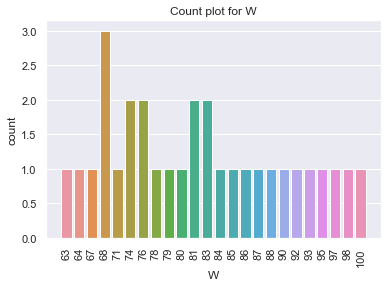

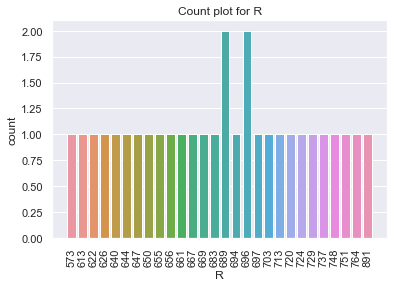

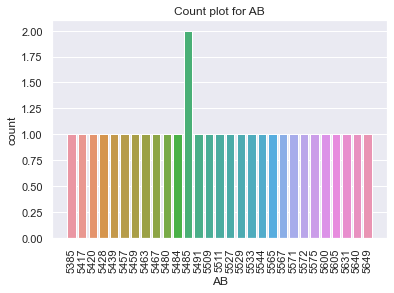

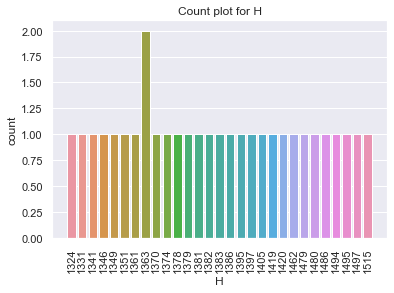

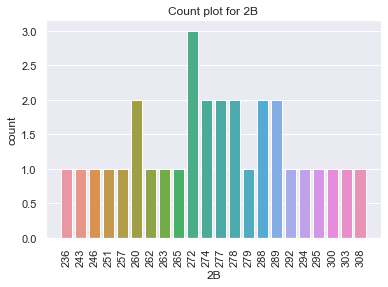

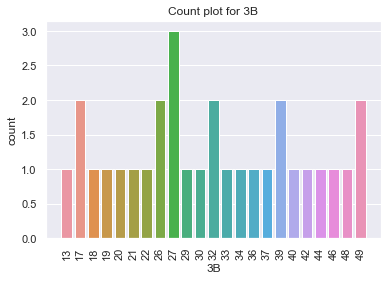

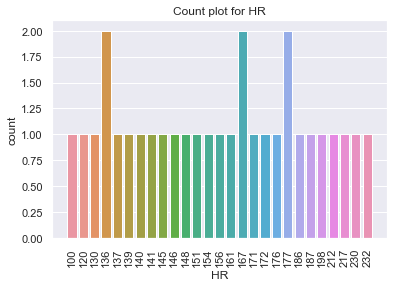

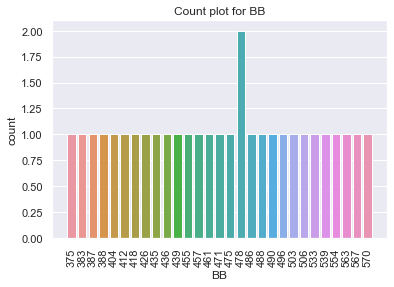

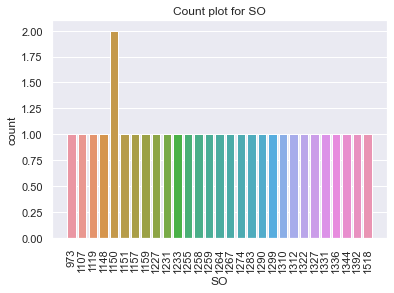

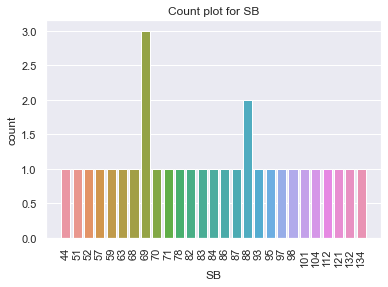

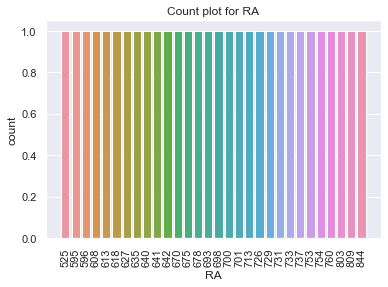

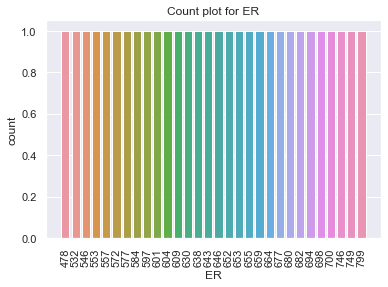

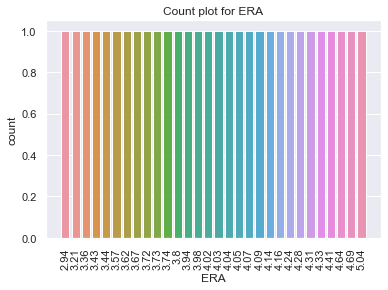

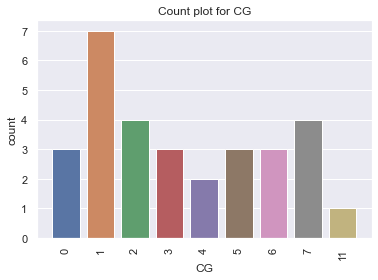

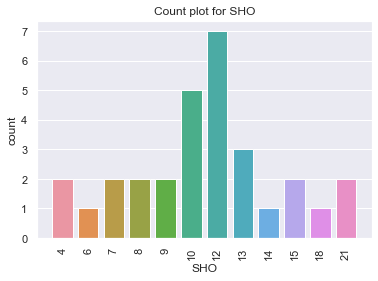

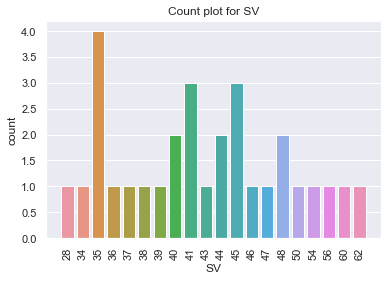

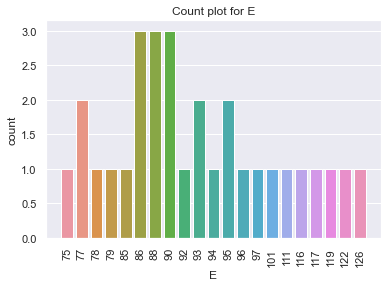

In [12]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

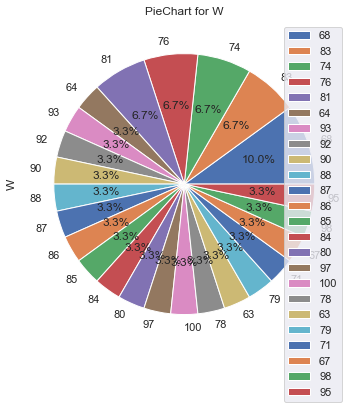

<Figure size 432x288 with 0 Axes>

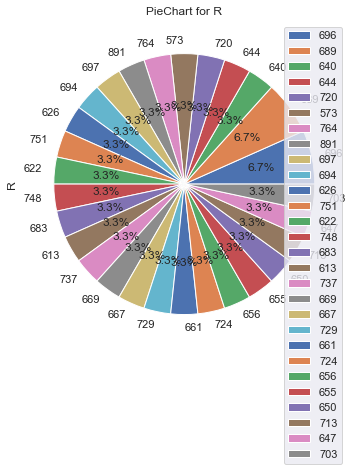

<Figure size 432x288 with 0 Axes>

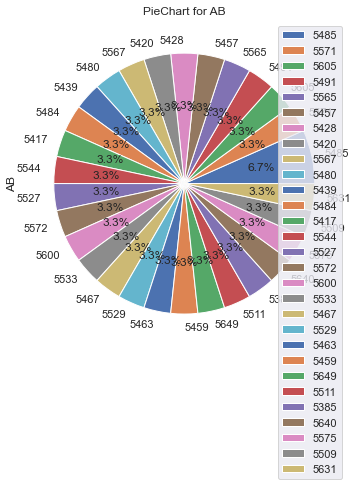

<Figure size 432x288 with 0 Axes>

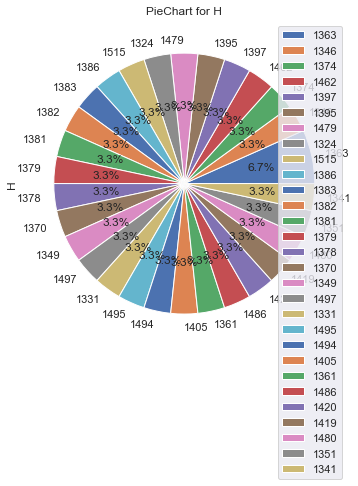

<Figure size 432x288 with 0 Axes>

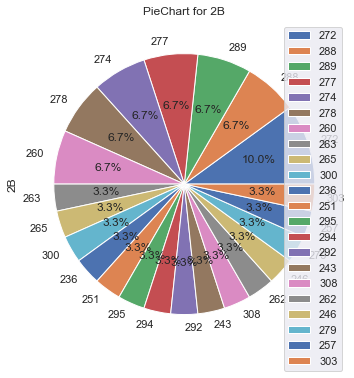

<Figure size 432x288 with 0 Axes>

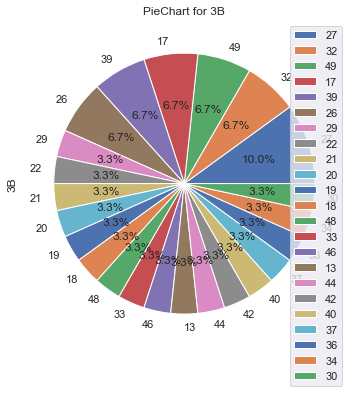

<Figure size 432x288 with 0 Axes>

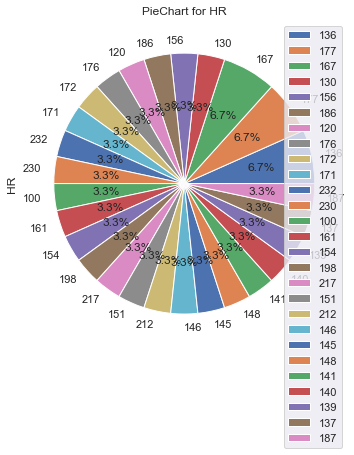

<Figure size 432x288 with 0 Axes>

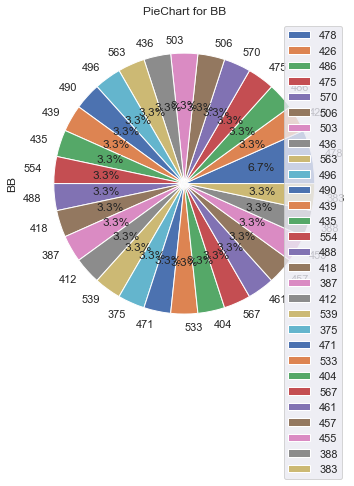

<Figure size 432x288 with 0 Axes>

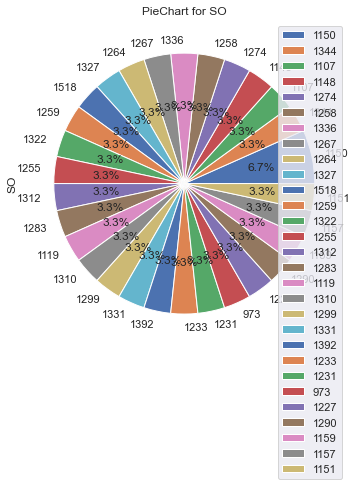

<Figure size 432x288 with 0 Axes>

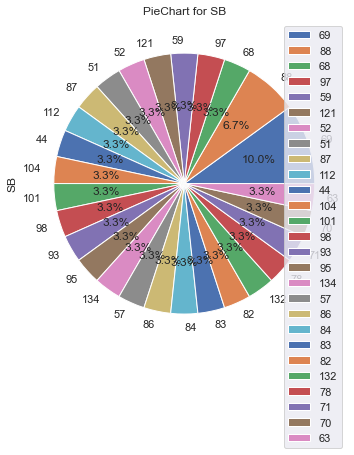

<Figure size 432x288 with 0 Axes>

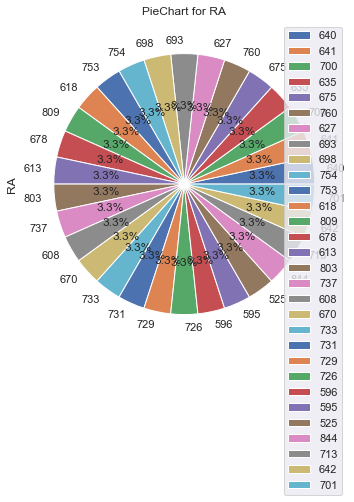

<Figure size 432x288 with 0 Axes>

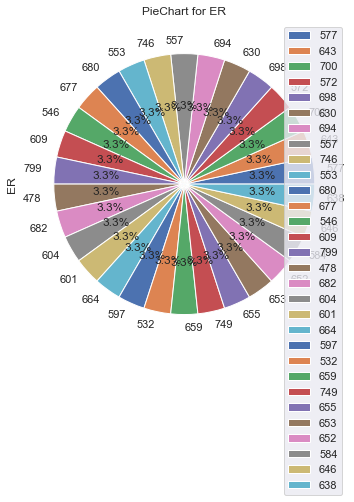

<Figure size 432x288 with 0 Axes>

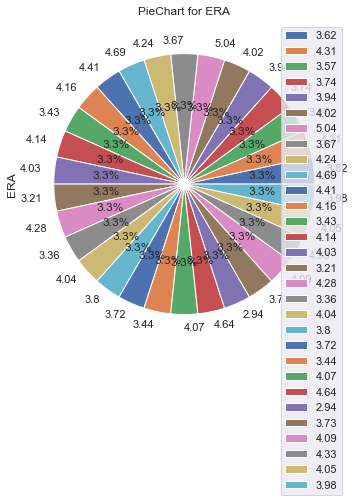

<Figure size 432x288 with 0 Axes>

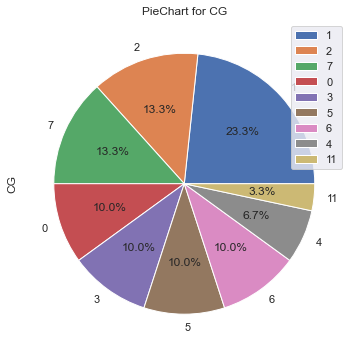

<Figure size 432x288 with 0 Axes>

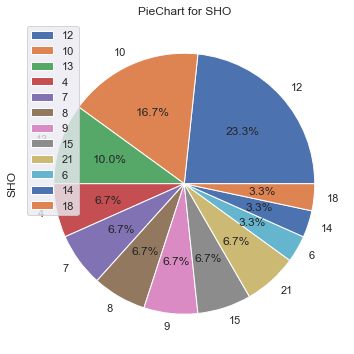

<Figure size 432x288 with 0 Axes>

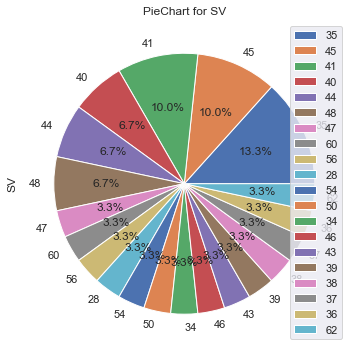

<Figure size 432x288 with 0 Axes>

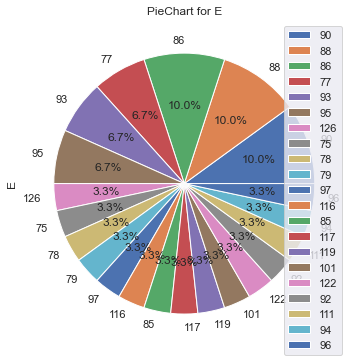

In [13]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(df[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

W


<Figure size 432x288 with 0 Axes>

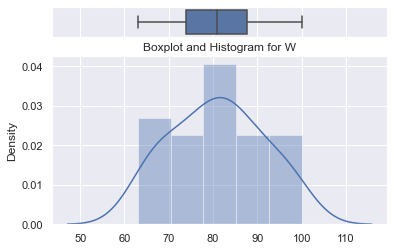

R


<Figure size 432x288 with 0 Axes>

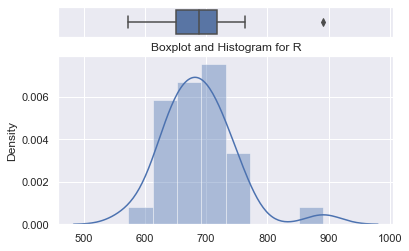

AB


<Figure size 432x288 with 0 Axes>

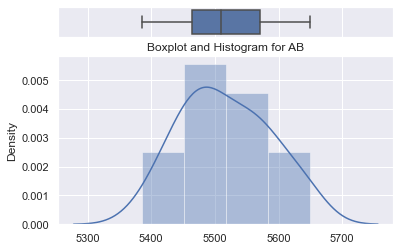

H


<Figure size 432x288 with 0 Axes>

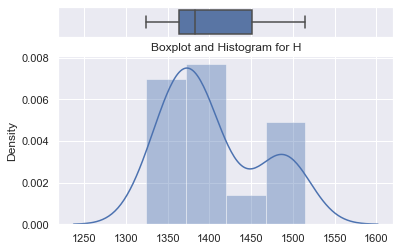

2B


<Figure size 432x288 with 0 Axes>

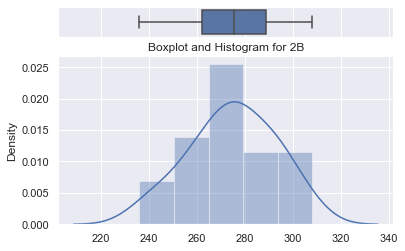

3B


<Figure size 432x288 with 0 Axes>

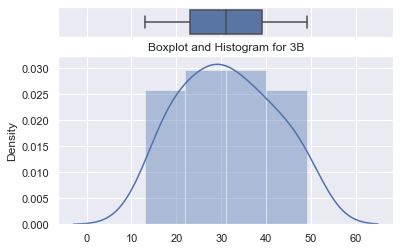

HR


<Figure size 432x288 with 0 Axes>

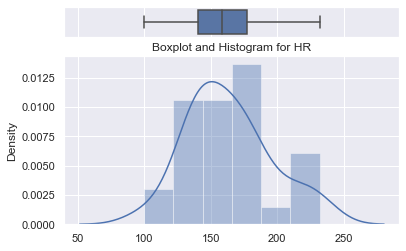

BB


<Figure size 432x288 with 0 Axes>

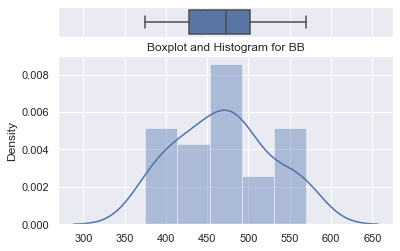

SO


<Figure size 432x288 with 0 Axes>

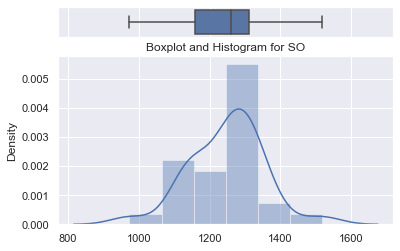

SB


<Figure size 432x288 with 0 Axes>

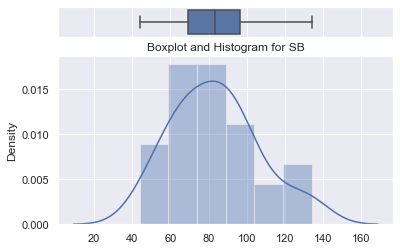

RA


<Figure size 432x288 with 0 Axes>

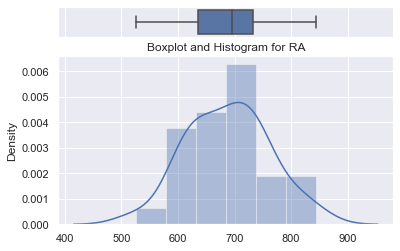

ER


<Figure size 432x288 with 0 Axes>

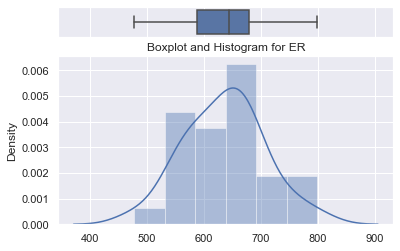

ERA


<Figure size 432x288 with 0 Axes>

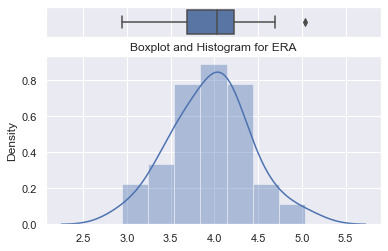

CG


<Figure size 432x288 with 0 Axes>

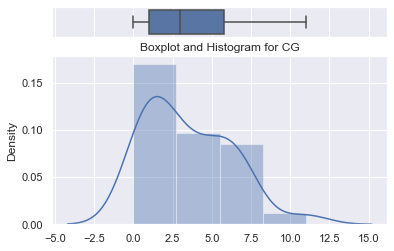

SHO


<Figure size 432x288 with 0 Axes>

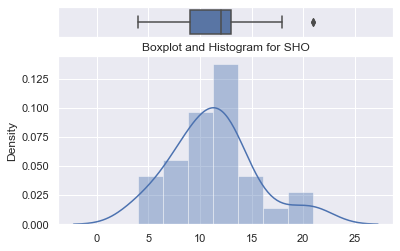

SV


<Figure size 432x288 with 0 Axes>

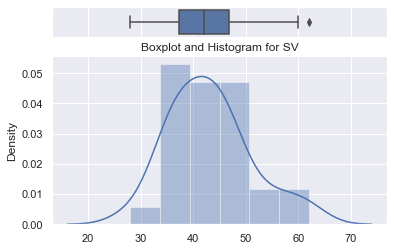

E


<Figure size 432x288 with 0 Axes>

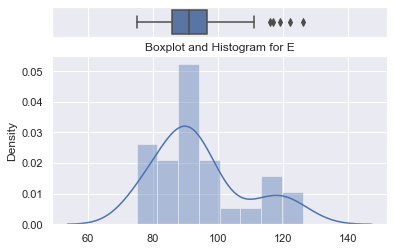

In [14]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

In [15]:
pd.DataFrame(df.skew(axis=0,skipna=True))

0
W    0.047089
R    1.200786
AB   0.183437
H    0.670254
2B  -0.230650
3B   0.129502
HR   0.516441
BB   0.158498
SO  -0.156065
SB   0.479893
RA   0.045734
ER   0.058710
ERA  0.053331
CG   0.736845
SHO  0.565790
SV   0.657524
E    0.890132

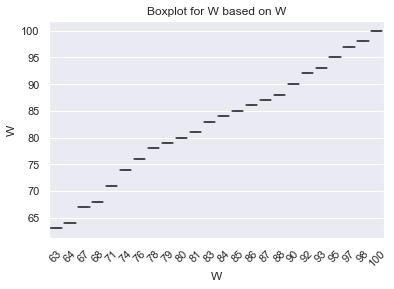

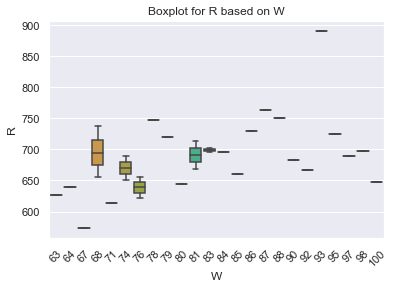

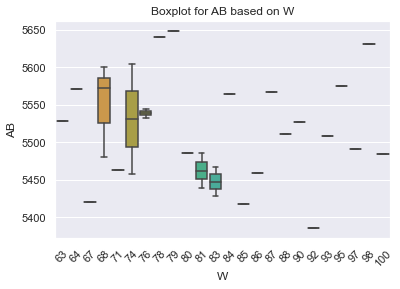

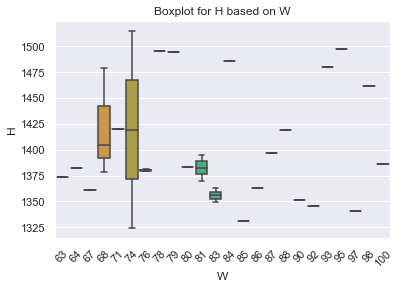

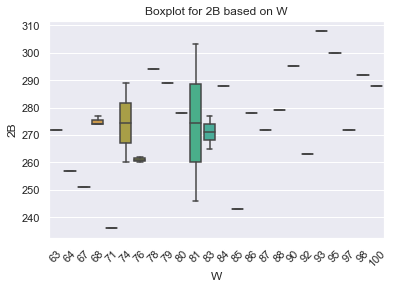

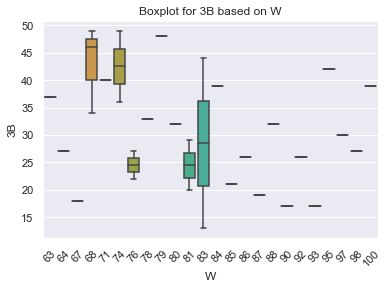

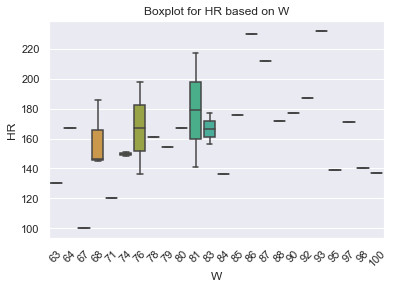

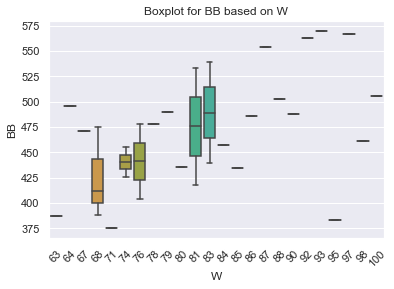

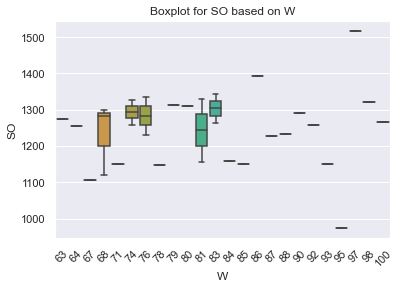

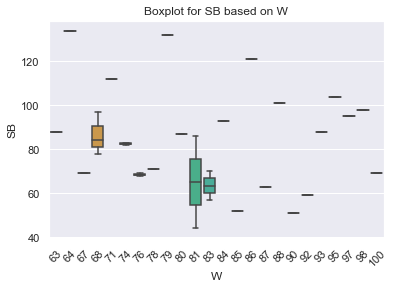

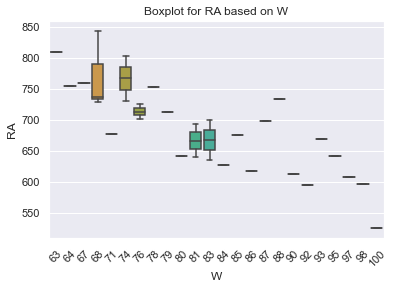

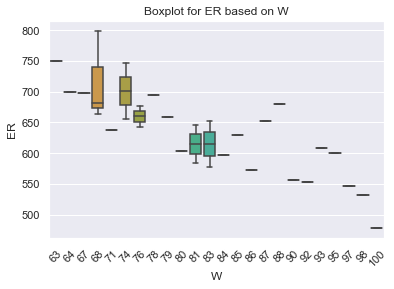

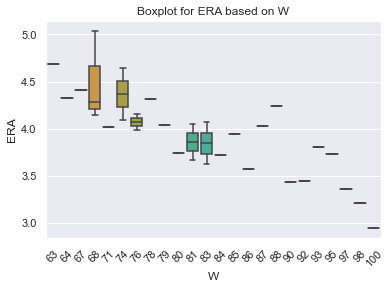

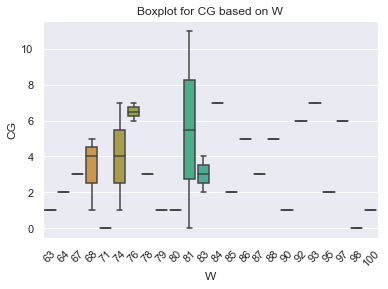

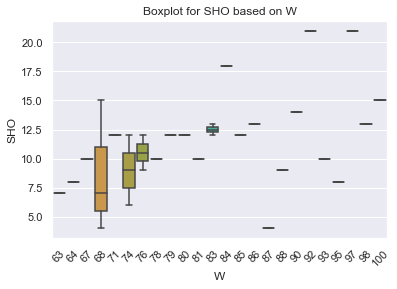

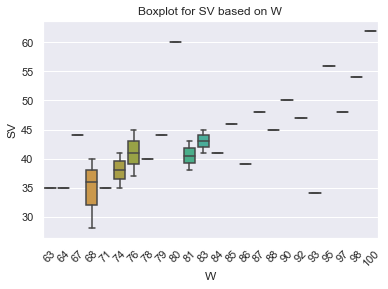

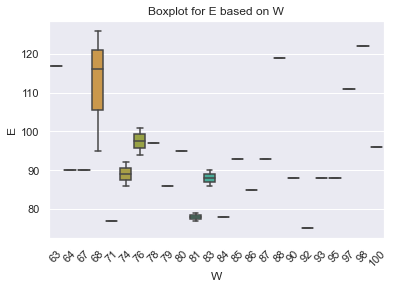

In [16]:
#Bivariate Analysis
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.boxplot(x='W',y=i,data=df)
    plt.xticks(rotation=45)
    plt.plot()
    plt.title(f"Boxplot for {i} based on W")
    plt.show()

In [17]:
WDF= pd.DataFrame(df[['W','R']].groupby('W')['R'].nunique())
WDF=WDF.reset_index(drop=False)
WDF

W  R
0    63  1
1    64  1
2    67  1
3    68  3
4    71  1
5    74  2
6    76  2
7    78  1
8    79  1
9    80  1
10   81  2
11   83  2
12   84  1
13   85  1
14   86  1
15   87  1
16   88  1
17   90  1
18   92  1
19   93  1
20   95  1
21   97  1
22   98  1
23  100  1

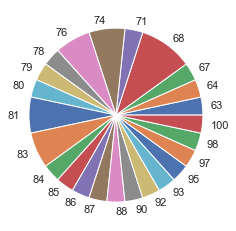

In [18]:
plt.pie(WDF['R'],labels=WDF['W'])
plt.show()

# Multivariate Analysis

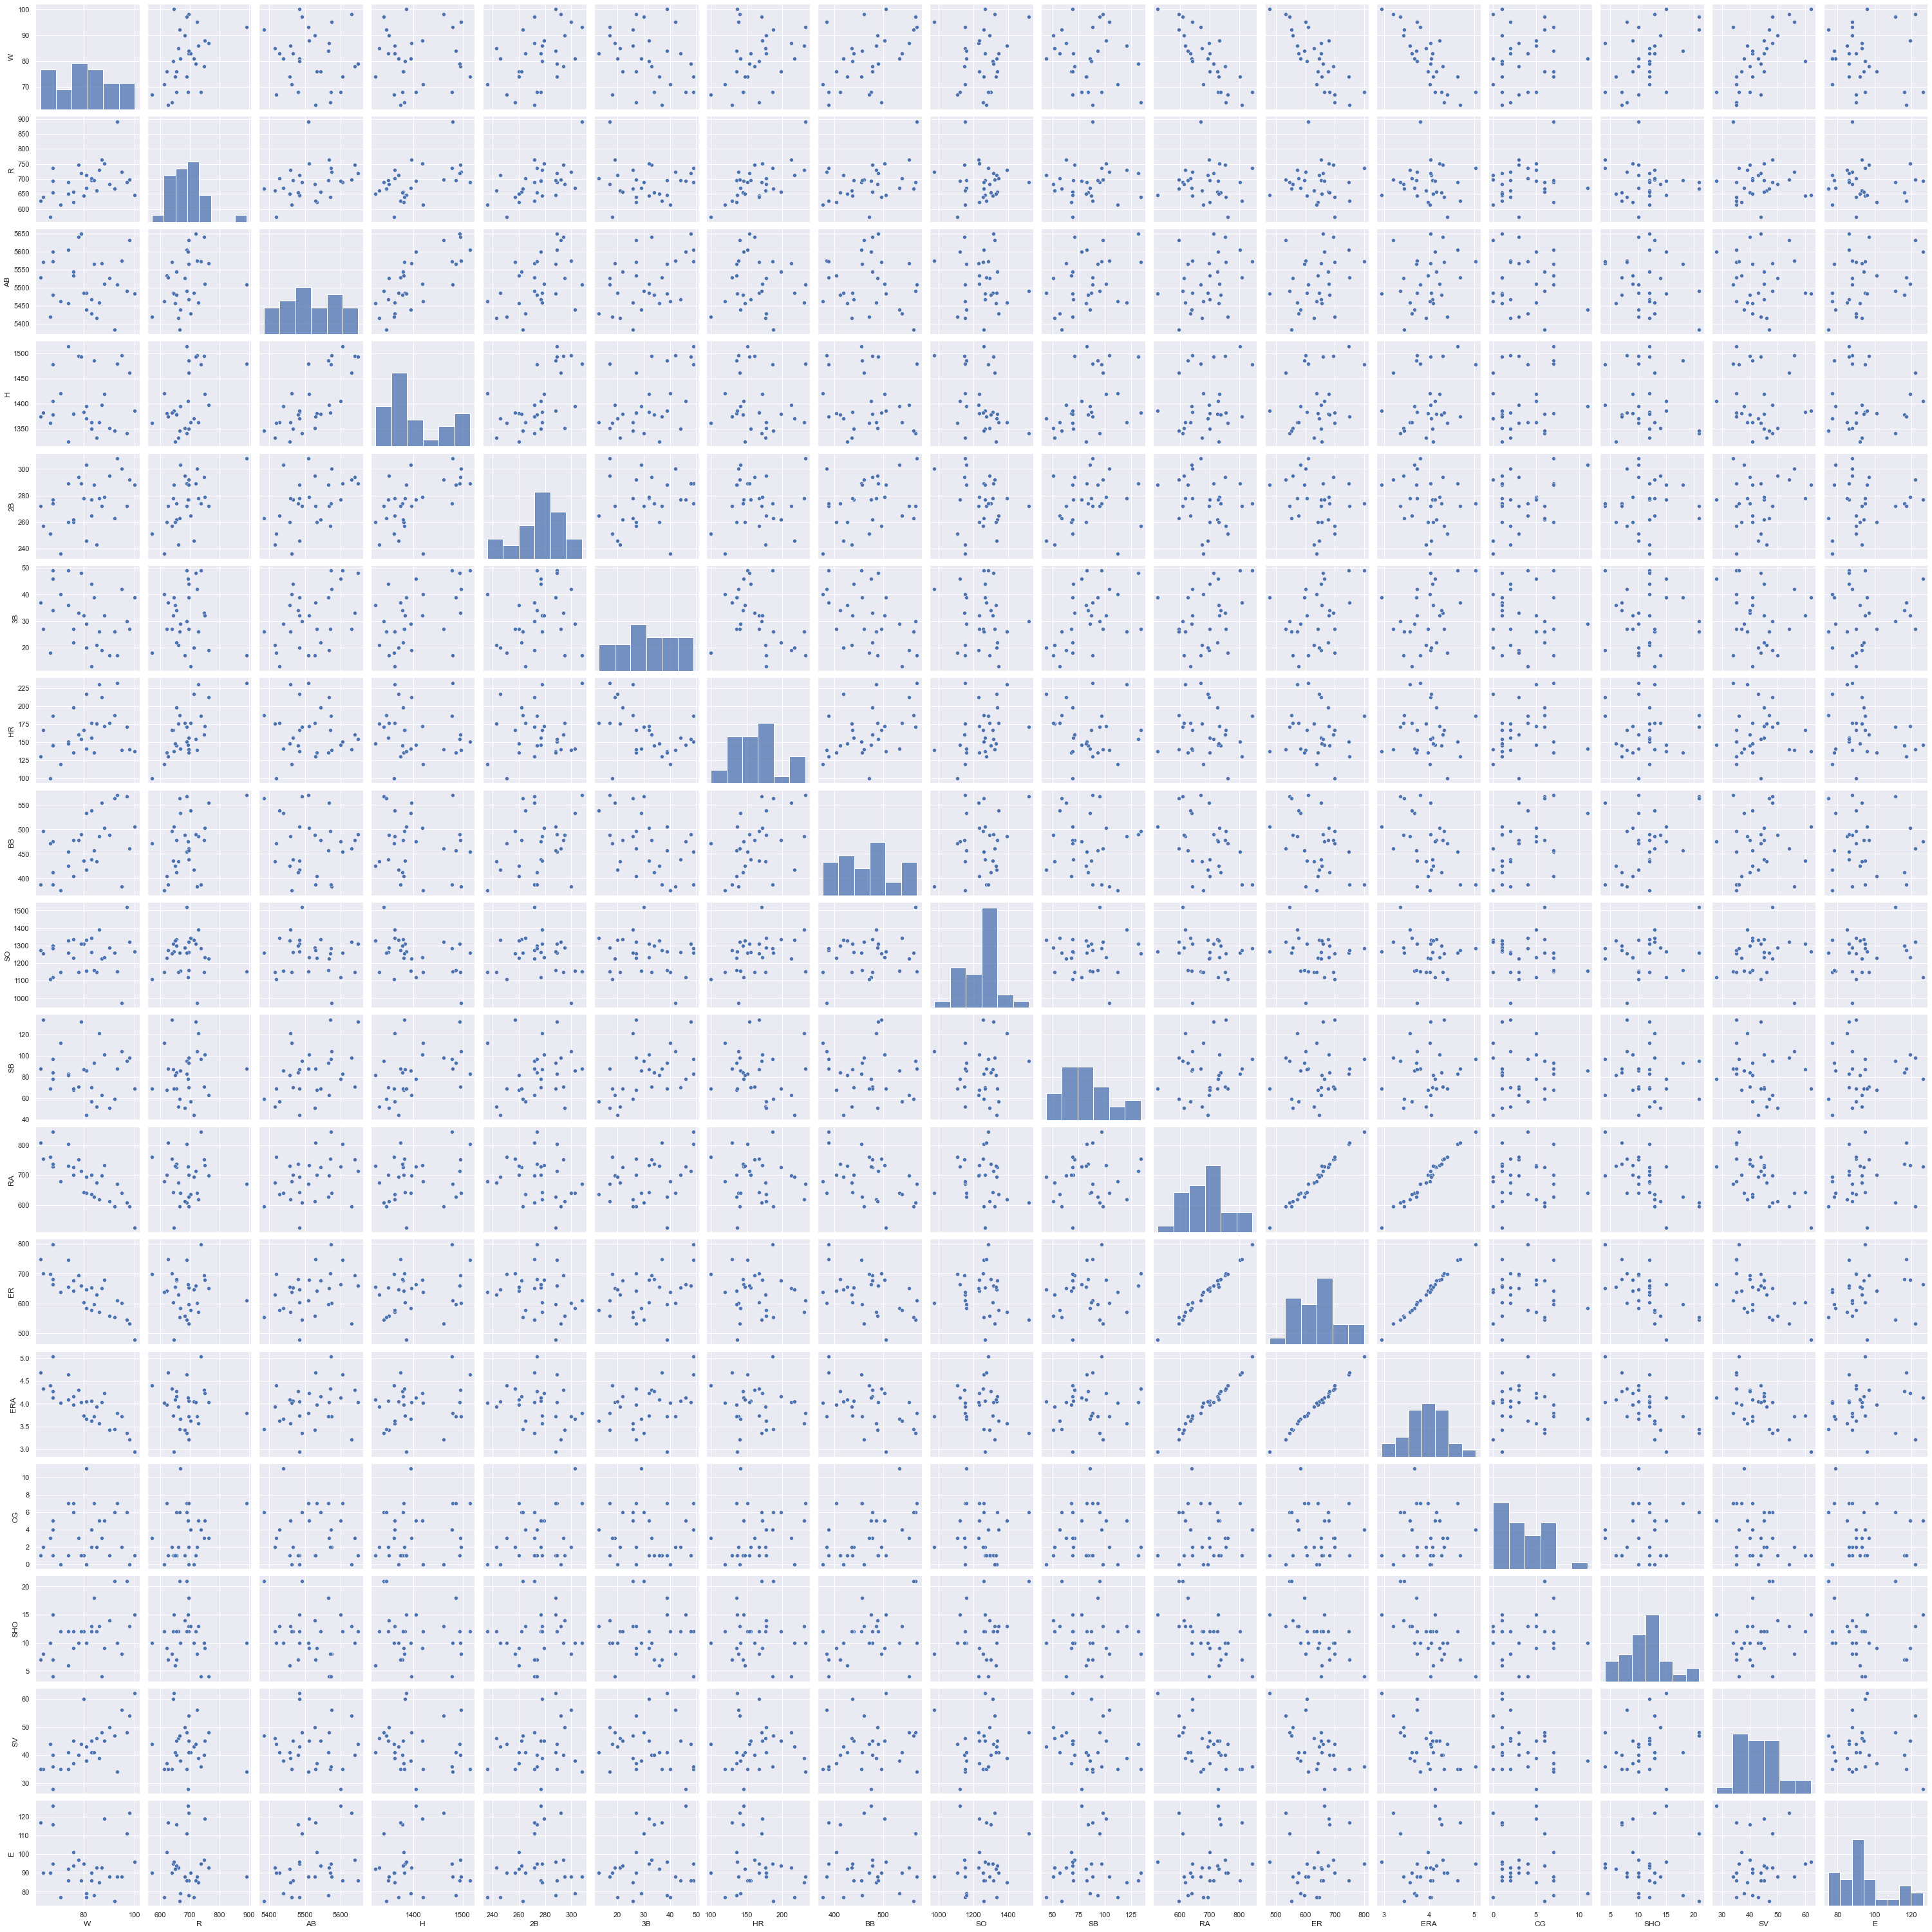

In [19]:
sns.pairplot(df)
plt.plot()
plt.show()

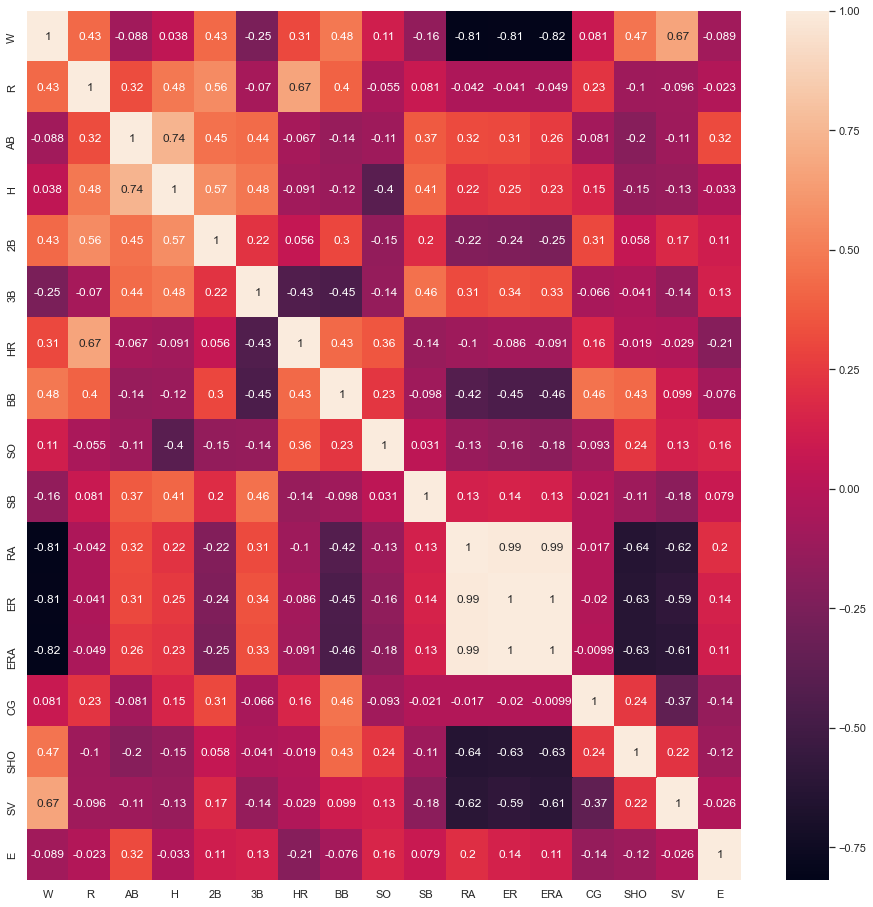

In [20]:
plt.figure(figsize= (16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here we can infer that "density" has strong positive correlation with "AB"(At Bat) whereas it has strong negative correlation with "HR"(Home runs).Dark shades represents positive correlation while lighter shades represents negative correlation.

# Data Scaling 

In [21]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [22]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)

In [23]:
df=pd.concat([df_num],axis=1)

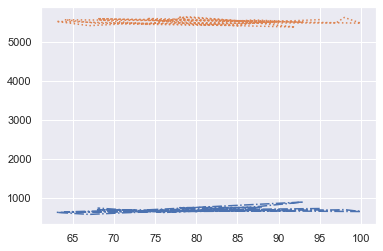

In [24]:
plt.plot(df["W"],df["R"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["AB"],label="Line2",linestyle=":")
plt.plot();

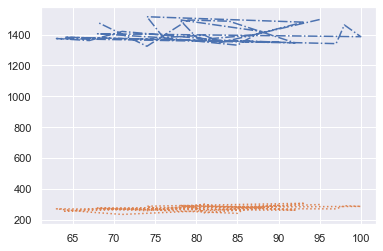

In [25]:
plt.plot(df["W"],df["H"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["2B"],label="Line2",linestyle=":")
plt.plot();

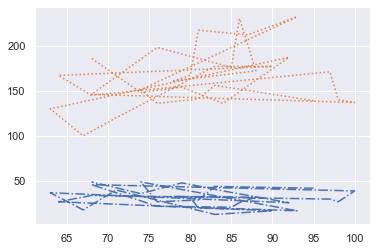

In [26]:
plt.plot(df["W"],df["3B"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["HR"],label="Line2",linestyle=":")
plt.plot();

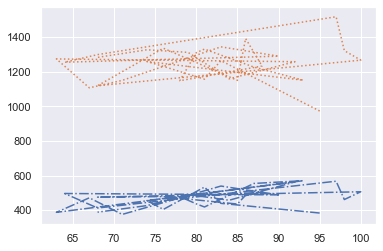

In [27]:
plt.plot(df["W"],df["BB"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["SO"],label="Line2",linestyle=":")
plt.plot();

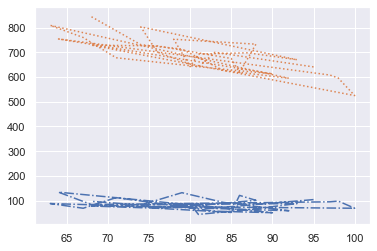

In [28]:
plt.plot(df["W"],df["SB"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["RA"],label="Line2",linestyle=":")
plt.plot();

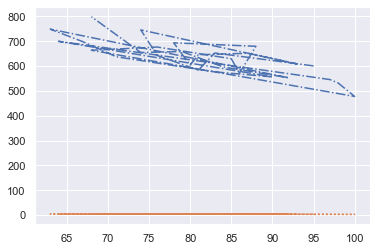

In [29]:
plt.plot(df["W"],df["ER"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["ERA"],label="Line2",linestyle=":")
plt.plot();

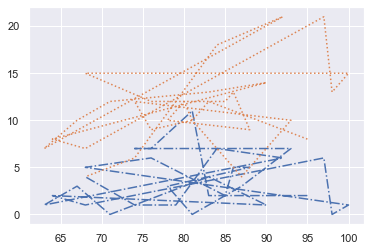

In [30]:
plt.plot(df["W"],df["CG"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["SHO"],label="Line2",linestyle=":")
plt.plot();

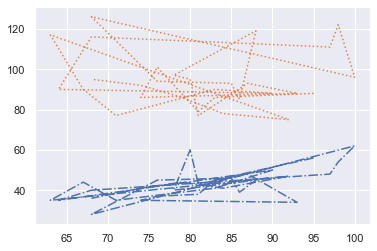

In [31]:
plt.plot(df["W"],df["SV"],label="Line1",linestyle="-.")
plt.plot(df["W"],df["E"],label="Line2",linestyle=":")
plt.plot();

# MinMax Sacaling/ Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler=MinMaxScaler()
MinMax=MinMaxscaler.fit_transform(df[numCol])
print(MinMax)

[[0.86486486 0.47484277 0.71969697 0.90575916 0.88888889 0.80555556
  0.29545455 0.04102564 0.         0.66666667 0.36363636 0.38317757
  0.37619048 0.18181818 0.23529412 0.82352941 0.25490196]
 [0.54054054 0.38679245 0.31060606 0.13089005 0.56944444 0.86111111
  0.42424242 0.32820513 0.53394495 0.28888889 0.54858934 0.54517134
  0.53809524 0.18181818 0.47058824 0.5        0.21568627]
 [0.48648649 0.30188679 0.20454545 0.37172775 0.93055556 0.44444444
  0.31060606 0.81025641 0.33761468 0.46666667 0.36050157 0.33021807
  0.34761905 1.         0.35294118 0.29411765 0.07843137]
 [0.35135135 0.15408805 0.56060606 0.29842932 0.33333333 0.38888889
  0.27272727 0.14871795 0.4733945  0.26666667 0.55172414 0.51401869
  0.4952381  0.63636364 0.29411765 0.26470588 0.50980392]
 [0.2972973  0.36477987 0.83333333 1.         0.73611111 1.
  0.38636364 0.41025641 0.52477064 0.43333333 0.87147335 0.83489097
  0.80952381 0.63636364 0.47058824 0.20588235 0.21568627]
 [0.81081081 1.         0.46969697 0.8

In [33]:
df[numCol]

W      R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.0  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.0  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.0  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.0  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.0  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  891.0  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.0  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.0  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.0  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.0  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.0  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.0  5459.0  1363.0  278.0  26.0  230.0  486.0  1392.0  121.0   
12   85.0  661.0  5417.0  1331.0  243.0  21.0  176.0  435.0  1150.0   52.0   
13   76.0  656.0  5544.0  1379.0  262.0  22.0  198.0  478.0  1336.0   69.0   
14   68.0  694.0  5600.0  1405.0  277.0  46.0  146.0  475.0  1119.0   78.0   
15  100.0  647.0  5484.0  1386.0  288.0  39.0  137.0  506.0  1267.0   69.0   
16   98.0  697.0  5631.0  1462.0  292.0  27.0  140.0  461.0  1322.0   98.0   
17   97.0  689.0  5491.0  1341.0  272.0  30.0  171.0  567.0  1518.0   95.0   
18   68.0  655.0  5480.0  1378.0  274.0  34.0  145.0  412.0  1299.0   84.0   
19   64.0  640.0  5571.0  1382.0  257.0  27.0  167.0  496.0  1255.0  134.0   
20   90.0  683.0  5527.0  1351.0  295.0  17.0  177.0  488.0  1290.0   51.0   
21   83.0  703.0  5428.0  1363.0  265.0  13.0  177.0  539.0  1344.0   57.0   
22   71.0  613.0  5463.0  1420.0  236.0  40.0  120.0  375.0  1150.0  112.0   
23   67.0  573.0  5420.0  1361.0  251.0  18.0  100.0  471.0  1107.0   69.0   
24   63.0  626.0  5529.0  1374.0  272.0  37.0  130.0  387.0  1274.0   88.0   
25   92.0  667.0  5385.0  1346.0  263.0  26.0  187.0  563.0  1258.0   59.0   
26   84.0  696.0  5565.0  1486.0  288.0  39.0  136.0  457.0  1159.0   93.0   
27   79.0  720.0  5649.0  1494.0  289.0  48.0  154.0  490.0  1312.0  132.0   
28   74.0  650.0  5457.0  1324.0  260.0  36.0  148.0  426.0  1327.0   82.0   
29   68.0  737.0  5572.0  1479.0  274.0  49.0  186.0  388.0  1283.0   97.0   

       RA     ER   ERA    CG   SHO    SV      E  
0   641.0  601.0  3.73   2.0   8.0  56.0   88.0  
1   700.0  653.0  4.07   2.0  12.0  45.0   86.0  
2   640.0  584.0  3.67  11.0  10.0  38.0   79.0  
3   701.0  643.0  3.98   7.0   9.0  37.0  101.0  
4   803.0  746.0  4.64   7.0  12.0  35.0   86.0  
5   670.0  609.0  3.80   7.0  10.0  34.0   88.0  
6   698.0  652.0  4.03   3.0   4.0  48.0   93.0  
7   693.0  646.0  4.05   0.0  10.0  43.0   77.0  
8   642.0  604.0  3.74   1.0  12.0  60.0   95.0  
9   753.0  694.0  4.31   3.0  10.0  40.0   97.0  
10  733.0  680.0  4.24   5.0   9.0  45.0  119.0  
11  618.0  572.0  3.57   5.0  13.0  39.0   85.0  
12  675.0  630.0  3.94   2.0  12.0  46.0   93.0  
13  726.0  677.0  4.16   6.0  12.0  45.0   94.0  
14  729.0  664.0  4.14   5.0  15.0  28.0  126.0  
15  525.0  478.0  2.94   1.0  15.0  62.0   96.0  
16  596.0  532.0  3.21   0.0  13.0  54.0  122.0  
17  608.0  546.0  3.36   6.0  21.0  48.0  111.0  
18  737.0  682.0  4.28   1.0   7.0  40.0  116.0  
19  754.0  700.0  4.33   2.0   8.0  35.0   90.0  
20  613.0  557.0  3.43   1.0  14.0  50.0   88.0  
21  635.0  577.0  3.62   4.0  13.0  41.0   90.0  
22  678.0  638.0  4.02   0.0  12.0  35.0   77.0  
23  760.0  698.0  4.41   3.0  10.0  44.0   90.0  
24  809.0  749.0  4.69   1.0   7.0  35.0  117.0  
25  595.0  553.0  3.44   6.0  21.0  47.0   75.0  
26  627.0  597.0  3.72   7.0  18.0  41.0   78.0  
27  713.0  659.0  4.04   1.0  12.0  44.0   86.0  
28  731.0  655.0  4.09   1.0   6.0  41.0   92.0  
29  844.0  799.0  5.04   4.0   4.0  36.0   95.0

In [34]:
minMaxDF=pd.DataFrame(MinMax,columns=numCol)
minMaxDF

W         R        AB         H        2B        3B        HR  \
0   0.864865  0.474843  0.719697  0.905759  0.888889  0.805556  0.295455   
1   0.540541  0.386792  0.310606  0.130890  0.569444  0.861111  0.424242   
2   0.486486  0.301887  0.204545  0.371728  0.930556  0.444444  0.310606   
3   0.351351  0.154088  0.560606  0.298429  0.333333  0.388889  0.272727   
4   0.297297  0.364780  0.833333  1.000000  0.736111  1.000000  0.386364   
5   0.810811  1.000000  0.469697  0.816754  1.000000  0.111111  1.000000   
6   0.648649  0.600629  0.689394  0.382199  0.500000  0.166667  0.848485   
7   0.486486  0.440252  0.378788  0.240838  0.138889  0.194444  0.886364   
8   0.459459  0.223270  0.378788  0.308901  0.583333  0.527778  0.507576   
9   0.405405  0.550314  0.965909  0.895288  0.805556  0.555556  0.462121   
10  0.675676  0.559748  0.477273  0.497382  0.597222  0.527778  0.545455   
11  0.621622  0.490566  0.280303  0.204188  0.583333  0.361111  0.984848   
12  0.594595  0.276730  0.121212  0.036649  0.097222  0.222222  0.575758   
13  0.351351  0.261006  0.602273  0.287958  0.361111  0.250000  0.742424   
14  0.135135  0.380503  0.814394  0.424084  0.569444  0.916667  0.348485   
15  1.000000  0.232704  0.375000  0.324607  0.722222  0.722222  0.280303   
16  0.945946  0.389937  0.931818  0.722513  0.777778  0.388889  0.303030   
17  0.918919  0.364780  0.401515  0.089005  0.500000  0.472222  0.537879   
18  0.135135  0.257862  0.359848  0.282723  0.527778  0.583333  0.340909   
19  0.027027  0.210692  0.704545  0.303665  0.291667  0.388889  0.507576   
20  0.729730  0.345912  0.537879  0.141361  0.819444  0.111111  0.583333   
21  0.540541  0.408805  0.162879  0.204188  0.402778  0.000000  0.583333   
22  0.216216  0.125786  0.295455  0.502618  0.000000  0.750000  0.151515   
23  0.108108  0.000000  0.132576  0.193717  0.208333  0.138889  0.000000   
24  0.000000  0.166667  0.545455  0.261780  0.500000  0.666667  0.227273   
25  0.783784  0.295597  0.000000  0.115183  0.375000  0.361111  0.659091   
26  0.567568  0.386792  0.681818  0.848168  0.722222  0.722222  0.272727   
27  0.432432  0.462264  1.000000  0.890052  0.736111  0.972222  0.409091   
28  0.297297  0.242138  0.272727  0.000000  0.333333  0.638889  0.363636   
29  0.135135  0.515723  0.708333  0.811518  0.527778  1.000000  0.651515   

          BB        SO        SB        RA        ER       ERA        CG  \
0   0.041026  0.000000  0.666667  0.363636  0.383178  0.376190  0.181818   
1   0.328205  0.533945  0.288889  0.548589  0.545171  0.538095  0.181818   
2   0.810256  0.337615  0.466667  0.360502  0.330218  0.347619  1.000000   
3   0.148718  0.473394  0.266667  0.551724  0.514019  0.495238  0.636364   
4   0.410256  0.524771  0.433333  0.871473  0.834891  0.809524  0.636364   
5   1.000000  0.326606  0.488889  0.454545  0.408100  0.409524  0.636364   
6   0.917949  0.466055  0.211111  0.542320  0.542056  0.519048  0.272727   
7   0.220513  0.656881  0.000000  0.526646  0.523364  0.528571  0.000000   
8   0.312821  0.618349  0.477778  0.366771  0.392523  0.380952  0.090909   
9   0.528205  0.321101  0.300000  0.714734  0.672897  0.652381  0.272727   
10  0.656410  0.477064  0.633333  0.652038  0.629283  0.619048  0.454545   
11  0.569231  0.768807  0.855556  0.291536  0.292835  0.300000  0.454545   
12  0.307692  0.324771  0.088889  0.470219  0.473520  0.476190  0.181818   
13  0.528205  0.666055  0.277778  0.630094  0.619938  0.580952  0.545455   
14  0.512821  0.267890  0.377778  0.639498  0.579439  0.571429  0.454545   
15  0.671795  0.539450  0.277778  0.000000  0.000000  0.000000  0.090909   
16  0.441026  0.640367  0.600000  0.222571  0.168224  0.128571  0.000000   
17  0.984615  1.000000  0.566667  0.260188  0.211838  0.200000  0.545455   
18  0.189744  0.598165  0.444444  0.664577  0.635514  0.638095  0.090909   
19  0.620513  0.517431  1.000000  0.717868  0.691589  0.661905  0.181818   
20  0.579487  0.581651  0.077778  0.275862  0.246106  0.23

In [35]:
minMaxDF.describe().T

count      mean       std  min       25%       50%       75%  max
W     30.0  0.485586  0.282526  0.0  0.297297  0.486486  0.668919  1.0
R     30.0  0.362369  0.184785  0.0  0.246069  0.364780  0.456761  1.0
AB    30.0  0.497222  0.266922  0.0  0.299242  0.473485  0.700758  1.0
H     30.0  0.416405  0.299167  0.0  0.204188  0.306283  0.667539  1.0
2B    30.0  0.537963  0.251325  0.0  0.364583  0.548611  0.732639  1.0
3B    30.0  0.508333  0.290343  0.0  0.277778  0.500000  0.722222  1.0
HR    30.0  0.482071  0.241086  0.0  0.304924  0.443182  0.583333  1.0
BB    30.0  0.482564  0.292583  0.0  0.273077  0.502564  0.647436  1.0
SO    30.0  0.504954  0.190384  0.0  0.338532  0.529358  0.621101  1.0
SB    30.0  0.438889  0.253502  0.0  0.277778  0.438889  0.583333  1.0
RA    30.0  0.511703  0.226044  0.0  0.348746  0.534483  0.650470  1.0
ER    30.0  0.491693  0.218507  0.0  0.340343  0.518692  0.626947  1.0
ERA   30.0  0.483968  0.216233  0.0  0.353571  0.516667  0.609524  1.0
CG    30.0  0.315152  0.251225  0.0  0.090909  0.272727  0.522727  1.0
SHO   30.0  0.429412  0.242363  0.0  0.294118  0.470588  0.529412  1.0
SV    30.0  0.443137  0.231451  0.0  0.272059  0.411765  0.551471  1.0
E     30.0  0.379085  0.273704  0.0  0.215686  0.313725  0.426471  1.0

In [36]:
df[numCol].describe().T

count         mean         std      min        25%       50%      75%  \
W     30.0    80.966667   10.453455    63.00    74.0000    81.000    87.75   
R     30.0   688.233333   58.761754   573.00   651.2500   689.000   718.25   
AB    30.0  5516.266667   70.467372  5385.00  5464.0000  5510.000  5570.00   
H     30.0  1403.533333   57.140923  1324.00  1363.0000  1382.500  1451.50   
2B    30.0   274.733333   18.095405   236.00   262.2500   275.500   288.75   
3B    30.0    31.300000   10.452355    13.00    23.0000    31.000    39.00   
HR    30.0   163.633333   31.823309   100.00   140.2500   158.500   177.00   
BB    30.0   469.100000   57.053725   375.00   428.2500   473.000   501.25   
SO    30.0  1248.200000  103.759470   973.00  1157.5000  1261.500  1311.50   
SB    30.0    83.500000   22.815225    44.00    69.0000    83.500    96.50   
RA    30.0   688.233333   72.108005   525.00   636.2500   695.500   732.50   
ER    30.0   635.833333   70.140786   478.00   587.2500   644.500   679.25   
ERA   30.0     3.956333    0.454089     2.94     3.6825     4.025     4.22   
CG    30.0     3.466667    2.763473     0.00     1.0000     3.000     5.75   
SHO   30.0    11.300000    4.120177     4.00     9.0000    12.000    13.00   
SV    30.0    43.066667    7.869335    28.00    37.2500    42.000    46.75   
E     30.0    94.333333   13.958889    75.00    86.0000    91.000    96.75   

         max  
W     100.00  
R     891.00  
AB   5649.00  
H    1515.00  
2B    308.00  
3B     49.00  
HR    232.00  
BB    570.00  
SO   1518.00  
SB    134.00  
RA    844.00  
ER    799.00  
ERA     5.04  
CG     11.00  
SHO    21.00  
SV     62.00  
E     126.00

# Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
stdscaled=stdscaler.fit_transform(df[numCol])
print(stdscaled)

[[ 1.36540860e+00  6.19077968e-01  8.47731264e-01  1.66368512e+00
   1.42017307e+00  1.04119304e+00 -7.87298598e-01 -1.53490242e+00
  -2.69762957e+00  9.13883291e-01 -6.66233927e-01 -5.05110079e-01
  -5.06955186e-01 -5.39806195e-01 -8.14628593e-01  1.67160651e+00
  -4.61469635e-01]
 [ 1.97838300e-01  1.34431656e-01 -7.11093535e-01 -9.70680764e-01
   1.27403389e-01  1.23580856e+00 -2.43966683e-01 -5.36591904e-01
   1.54878442e-01 -6.01825582e-01  1.65970766e-01  2.48929848e-01
   2.54597523e-01 -5.39806195e-01  1.72800005e-01  2.49879323e-01
  -6.07196888e-01]
 [ 3.24325082e-03 -3.32905860e-01 -1.11523330e+00 -1.51891367e-01
   1.58879521e+00 -2.23807850e-01 -7.23377196e-01  1.13914361e+00
  -8.93981893e-01  1.11449182e-01 -6.80339091e-01 -7.51623132e-01
  -6.41346840e-01  2.77264091e+00 -3.20914294e-01 -6.54856158e-01
  -1.11724227e+00]
 [-4.83244373e-01 -1.14641931e+00  2.41521620e-01 -4.01088140e-01
  -8.28122030e-01 -4.18423371e-01 -8.83180700e-01 -1.16053598e+00
  -1.68601848e-01 -

In [38]:
stdscaledDF= pd.DataFrame(stdscaled,columns=numCol)
stdscaledDF

W         R        AB         H        2B        3B        HR  \
0   1.365409  0.619078  0.847731  1.663685  1.420173  1.041193 -0.787299   
1   0.197838  0.134432 -0.711094 -0.970681  0.127403  1.235809 -0.243967   
2   0.003243 -0.332906 -1.115233 -0.151891  1.588795 -0.223808 -0.723377   
3  -0.483244 -1.146419  0.241522 -0.401088 -0.828122 -0.418423 -0.883181   
4  -0.677839  0.013270  1.280738  1.984081  0.801892  1.722347 -0.403770   
5   1.170814  3.509647 -0.104884  1.361089  1.869832 -1.391501  2.185047   
6   0.587028  1.311430  0.732263 -0.116292 -0.153633 -1.196885  1.545833   
7   0.003243  0.428681 -0.451289 -0.596886 -1.615025 -1.099578  1.705636   
8  -0.094054 -0.765626 -0.451289 -0.365489  0.183611  0.068115  0.107601   
9  -0.288649  1.034489  1.785913  1.628086  1.082929  0.165423 -0.084163   
10  0.684326  1.086415 -0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.705622 -0.826562 -0.721484  0.183611 -0.515731  2.121125   
12  0.392433 -0.471376 -1.432772 -1.291077 -1.783647 -1.002270  0.395247   
13 -0.483244 -0.557920  0.400291 -0.436688 -0.715707 -0.904962  1.098383   
14 -1.261625  0.099814  1.208570  0.026106  0.127403  1.430424 -0.563574   
15  1.851896 -0.713699 -0.465723 -0.312089  0.745685  0.749270 -0.851220   
16  1.657301  0.151740  1.656011  1.040693  0.970514 -0.418423 -0.755338   
17  1.560004  0.013270 -0.364688 -1.113079 -0.153633 -0.126500  0.235444   
18 -1.261625 -0.575229 -0.523457 -0.454487 -0.041219  0.262731 -0.595534   
19 -1.650815 -0.834861  0.789997 -0.383288 -0.996744 -0.418423  0.107601   
20  0.878921 -0.090583  0.154920 -0.935081  1.139136 -1.391501  0.427208   
21  0.197838  0.255593 -1.274002 -0.721484 -0.547085 -1.780732  0.427208   
22 -0.969732 -1.302198 -0.768828  0.293103 -2.177099  0.846578 -1.394552   
23 -1.358922 -1.994550 -1.389471 -0.757084 -1.333988 -1.294193 -2.033766   
24 -1.748112 -1.077184  0.183787 -0.525687 -0.153633  0.554654 -1.074945   
25  1.073516 -0.367523 -1.894646 -1.024080 -0.659500 -0.515731  0.746815   
26  0.295136  0.134432  0.703396  1.467888  0.745685  0.749270 -0.883181   
27 -0.191352  0.549843  1.915815  1.610286  0.801892  1.625040 -0.307888   
28 -0.677839 -0.661773 -0.855429 -1.415675 -0.828122  0.457346 -0.499652   
29 -1.261625  0.844092  0.804431  1.343289 -0.041219  1.722347  0.714854   

          BB        SO        SB        RA        ER       ERA        CG  \
0  -1.534902 -2.697630  0.913883 -0.666234 -0.505110 -0.506955 -0.539806   
1  -0.536592  0.154878 -0.601826  0.165971  0.248930  0.254598 -0.539806   
2   1.139144 -0.893982  0.111449 -0.680339 -0.751623 -0.641347  2.772641   
3  -1.160536 -0.168602 -0.690985  0.180076  0.103922  0.053010  1.300442   
4  -0.251360  0.105866 -0.022290  1.618803  1.597501  1.531318  1.300442   
5   1.798742 -0.952796  0.200609 -0.257184 -0.389104 -0.350165  1.300442   
6   1.513510 -0.207812 -0.913883  0.137760  0.234429  0.165003 -0.171757   
7  -0.910958  0.811641 -1.760897  0.067235  0.147424  0.209800 -1.275906   
8  -0.590073  0.605790  0.156029 -0.652129 -0.461608 -0.484557 -0.907856   
9   0.158660 -0.982204 -0.557246  0.913544  0.843461  0.792164 -0.171757   
10  0.604334 -0.148997  0.780144  0.631441  0.640451  0.635374  0.564343   
11  0.301276  1.409590  1.671738 -0.990653 -0.925632 -0.865333  0.564343   
12 -0.607900 -0.962599 -1.404260 -0.186658 -0.084588 -0.036584 -0.539806   
13  0.158660  0.860654 -0.646405  0.532705  0.596948  0.456185  0.932393   
14  0.105179 -1.266474 -0.245188  0.575021  0.408438  0.411388  0.564343   
15  0.657815  0.184286 -0.646405 -2.302433 -2.288705 -2.276445 -0.907856   
16 -0.144398  0.723420  0.646405 -1.300966 -1.505663 -1.671683 -1.275906   
17  1.745261  2.644696  0.512666 -1.131704 -1.302652 -1.335704  0.932393   
18 -1.017920  0.497964  0.022290  0.687862  0.669452  0.724968 -0.907856   
19  0.479546  0.066657  2.251273  0.927650  0.930466  0.836961 -0.539806   
20  0.336930  0.409742 -1.448839 -1.061179 -1.143144 -1.17

In [39]:
df[numCol]

W      R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.0  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.0  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.0  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.0  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.0  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  891.0  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.0  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.0  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.0  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.0  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.0  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.0  5459.0  1363.0  278.0  26.0  230.0  486.0  1392.0  121.0   
12   85.0  661.0  5417.0  1331.0  243.0  21.0  176.0  435.0  1150.0   52.0   
13   76.0  656.0  5544.0  1379.0  262.0  22.0  198.0  478.0  1336.0   69.0   
14   68.0  694.0  5600.0  1405.0  277.0  46.0  146.0  475.0  1119.0   78.0   
15  100.0  647.0  5484.0  1386.0  288.0  39.0  137.0  506.0  1267.0   69.0   
16   98.0  697.0  5631.0  1462.0  292.0  27.0  140.0  461.0  1322.0   98.0   
17   97.0  689.0  5491.0  1341.0  272.0  30.0  171.0  567.0  1518.0   95.0   
18   68.0  655.0  5480.0  1378.0  274.0  34.0  145.0  412.0  1299.0   84.0   
19   64.0  640.0  5571.0  1382.0  257.0  27.0  167.0  496.0  1255.0  134.0   
20   90.0  683.0  5527.0  1351.0  295.0  17.0  177.0  488.0  1290.0   51.0   
21   83.0  703.0  5428.0  1363.0  265.0  13.0  177.0  539.0  1344.0   57.0   
22   71.0  613.0  5463.0  1420.0  236.0  40.0  120.0  375.0  1150.0  112.0   
23   67.0  573.0  5420.0  1361.0  251.0  18.0  100.0  471.0  1107.0   69.0   
24   63.0  626.0  5529.0  1374.0  272.0  37.0  130.0  387.0  1274.0   88.0   
25   92.0  667.0  5385.0  1346.0  263.0  26.0  187.0  563.0  1258.0   59.0   
26   84.0  696.0  5565.0  1486.0  288.0  39.0  136.0  457.0  1159.0   93.0   
27   79.0  720.0  5649.0  1494.0  289.0  48.0  154.0  490.0  1312.0  132.0   
28   74.0  650.0  5457.0  1324.0  260.0  36.0  148.0  426.0  1327.0   82.0   
29   68.0  737.0  5572.0  1479.0  274.0  49.0  186.0  388.0  1283.0   97.0   

       RA     ER   ERA    CG   SHO    SV      E  
0   641.0  601.0  3.73   2.0   8.0  56.0   88.0  
1   700.0  653.0  4.07   2.0  12.0  45.0   86.0  
2   640.0  584.0  3.67  11.0  10.0  38.0   79.0  
3   701.0  643.0  3.98   7.0   9.0  37.0  101.0  
4   803.0  746.0  4.64   7.0  12.0  35.0   86.0  
5   670.0  609.0  3.80   7.0  10.0  34.0   88.0  
6   698.0  652.0  4.03   3.0   4.0  48.0   93.0  
7   693.0  646.0  4.05   0.0  10.0  43.0   77.0  
8   642.0  604.0  3.74   1.0  12.0  60.0   95.0  
9   753.0  694.0  4.31   3.0  10.0  40.0   97.0  
10  733.0  680.0  4.24   5.0   9.0  45.0  119.0  
11  618.0  572.0  3.57   5.0  13.0  39.0   85.0  
12  675.0  630.0  3.94   2.0  12.0  46.0   93.0  
13  726.0  677.0  4.16   6.0  12.0  45.0   94.0  
14  729.0  664.0  4.14   5.0  15.0  28.0  126.0  
15  525.0  478.0  2.94   1.0  15.0  62.0   96.0  
16  596.0  532.0  3.21   0.0  13.0  54.0  122.0  
17  608.0  546.0  3.36   6.0  21.0  48.0  111.0  
18  737.0  682.0  4.28   1.0   7.0  40.0  116.0  
19  754.0  700.0  4.33   2.0   8.0  35.0   90.0  
20  613.0  557.0  3.43   1.0  14.0  50.0   88.0  
21  635.0  577.0  3.62   4.0  13.0  41.0   90.0  
22  678.0  638.0  4.02   0.0  12.0  35.0   77.0  
23  760.0  698.0  4.41   3.0  10.0  44.0   90.0  
24  809.0  749.0  4.69   1.0   7.0  35.0  117.0  
25  595.0  553.0  3.44   6.0  21.0  47.0   75.0  
26  627.0  597.0  3.72   7.0  18.0  41.0   78.0  
27  713.0  659.0  4.04   1.0  12.0  44.0   86.0  
28  731.0  655.0  4.09   1.0   6.0  41.0   92.0  
29  844.0  799.0  5.04   4.0   4.0  36.0   95.0

In [40]:
stdscaledDF.describe().T

count          mean       std       min       25%       50%       75%  \
W     30.0 -1.554312e-16  1.017095 -1.748112 -0.677839  0.003243  0.660002   
R     30.0 -2.627528e-16  1.017095 -1.994550 -0.640137  0.013270  0.519552   
AB    30.0  3.497203e-15  1.017095 -1.894646 -0.754394 -0.090450  0.775563   
H     30.0  5.329071e-16  1.017095 -1.415675 -0.721484 -0.374388  0.853796   
2B    30.0 -8.699060e-16  1.017095 -2.177099 -0.701655  0.043092  0.787840   
3B    30.0 -5.921189e-17  1.017095 -1.780732 -0.807654 -0.029192  0.749270   
HR    30.0  2.368476e-16  1.017095 -2.033766 -0.747348 -0.164065  0.427208   
BB    30.0 -4.144833e-16  1.017095 -1.677518 -0.728232  0.069525  0.573137   
SO    30.0 -4.440892e-16  1.017095 -2.697630 -0.889081  0.130372  0.620494   
SB    30.0 -7.401487e-18  1.017095 -1.760897 -0.646405  0.000000  0.579536   
RA    30.0 -2.220446e-16  1.017095 -2.302433 -0.733233  0.102498  0.624389   
ER    30.0 -5.921189e-16  1.017095 -2.288705 -0.704496  0.125673  0.629575   
ERA   30.0  1.776357e-16  1.017095 -2.276445 -0.613349  0.153804  0.590577   
CG    30.0 -8.049117e-17  1.017095 -1.275906 -0.907856 -0.171757  0.840380   
SHO   30.0 -1.628327e-16  1.017095 -1.802057 -0.567771  0.172800  0.419657   
SV    30.0 -3.996803e-16  1.017095 -1.947335 -0.751792 -0.137864  0.476063   
E     30.0  3.659110e-16  1.017095 -1.408697 -0.607197 -0.242879  0.176087   

          max  
W    1.851896  
R    3.509647  
AB   1.915815  
H    1.984081  
2B   1.869832  
3B   1.722347  
HR   2.185047  
BB   1.798742  
SO   2.644696  
SB   2.251273  
RA   2.197114  
ER   2.366042  
ERA  2.427263  
CG   2.772641  
SHO  2.394514  
SV   2.447094  
E    2.307348

# Missing Value Analysis

In [41]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [42]:
df.isna().sum()/df.shape[0]*100

W      0.0
R      0.0
AB     0.0
H      0.0
2B     0.0
3B     0.0
HR     0.0
BB     0.0
SO     0.0
SB     0.0
RA     0.0
ER     0.0
ERA    0.0
CG     0.0
SHO    0.0
SV     0.0
E      0.0
dtype: float64

In [43]:
df[df.isna().sum(axis=1)>1]

Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []

In [44]:
df[df.isna().sum(axis=1)>1].shape

(0, 17)

<AxesSubplot:>

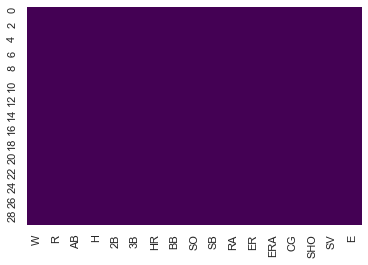

In [45]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Check Duplicate,repeated and unknow

In [46]:
df[df.duplicated()]

Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []

# Outlier Analysis

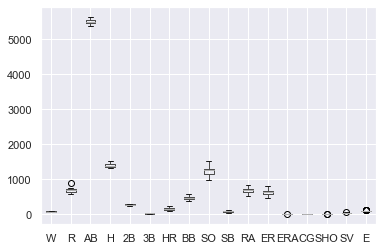

In [47]:
df.boxplot();

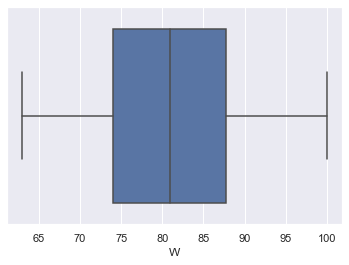

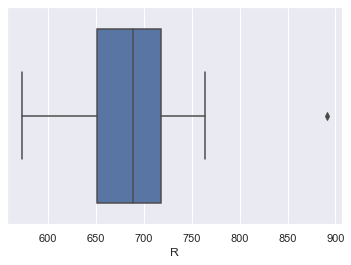

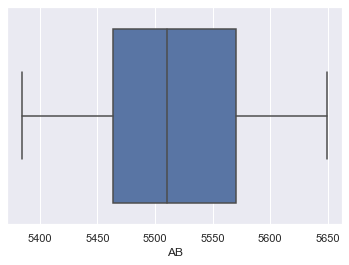

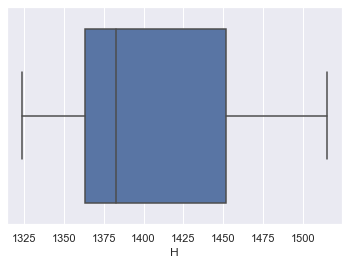

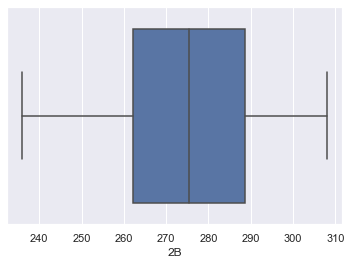

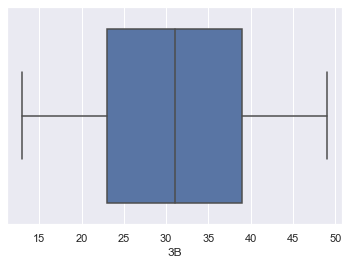

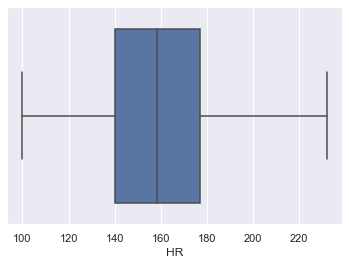

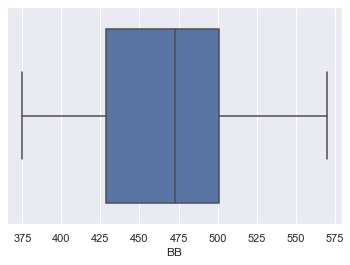

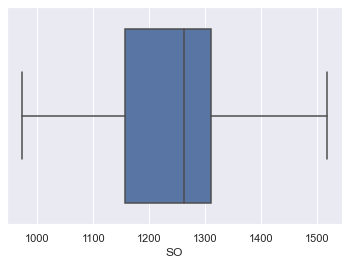

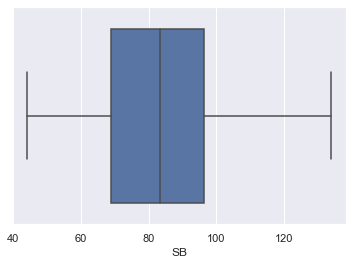

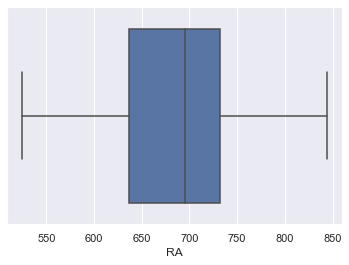

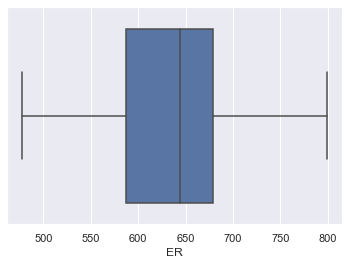

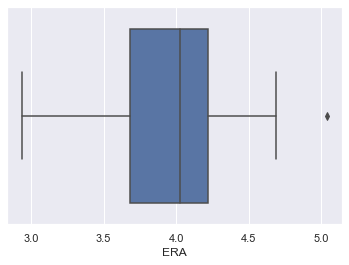

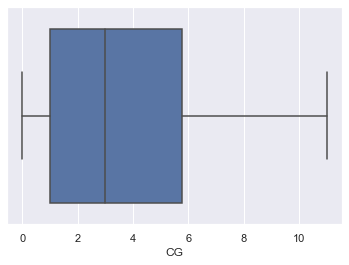

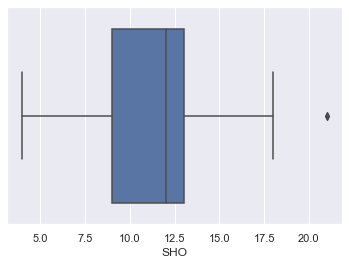

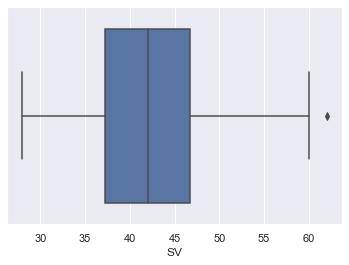

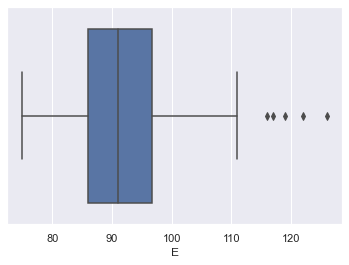

In [48]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

A box plot shows distribution of quantitative data in a way that facilitates comparison between variables.
variable "W" boxplot shows it is symmetric.
For "W" analysis of box-plot
Min=10
Q1=74
Median=82
Q3=91
Max=100
Outliers, which are data values that are far away from other data values. Variable "R" analysis of box plot it shows the outliers
Min=200
Q1=650
Median=680
Q3=730
Max=890

In [49]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(((df<(Q1-1.5 * IQR)) | (df > (Q3 +1.5 * IQR ))).sum())

W      0
R      1
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    1
CG     0
SHO    2
SV     1
E      5
dtype: int64


In [50]:
outNum =[]
for i in numCol:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outNum.append([i,q1,q3,iqr,lower_limit,upper_limit])
    
    df[i] = np.where(df[i]> upper_limit,upper_limit,
                 np.where(df[i]< lower_limit,lower_limit,
                         df[i]))

In [51]:
pd.DataFrame(outNum,columns=["variableName","Q1","Q3","IQR","lowe_limit","upper_limit"])

variableName         Q1       Q3       IQR  lowe_limit  upper_limit
0             W    74.0000    87.75   13.7500    53.37500    108.37500
1             R   651.2500   718.25   67.0000   550.75000    818.75000
2            AB  5464.0000  5570.00  106.0000  5305.00000   5729.00000
3             H  1363.0000  1451.50   88.5000  1230.25000   1584.25000
4            2B   262.2500   288.75   26.5000   222.50000    328.50000
5            3B    23.0000    39.00   16.0000    -1.00000     63.00000
6            HR   140.2500   177.00   36.7500    85.12500    232.12500
7            BB   428.2500   501.25   73.0000   318.75000    610.75000
8            SO  1157.5000  1311.50  154.0000   926.50000   1542.50000
9            SB    69.0000    96.50   27.5000    27.75000    137.75000
10           RA   636.2500   732.50   96.2500   491.87500    876.87500
11           ER   587.2500   679.25   92.0000   449.25000    817.25000
12          ERA     3.6825     4.22    0.5375     2.87625      5.02625
13           CG     1.0000     5.75    4.7500    -6.12500     12.87500
14          SHO     9.0000    13.00    4.0000     3.00000     19.00000
15           SV    37.2500    46.75    9.5000    23.00000     61.00000
16            E    86.0000    96.75   10.7500    69.87500    112.87500

# Heatmap of Dataset

<AxesSubplot:>

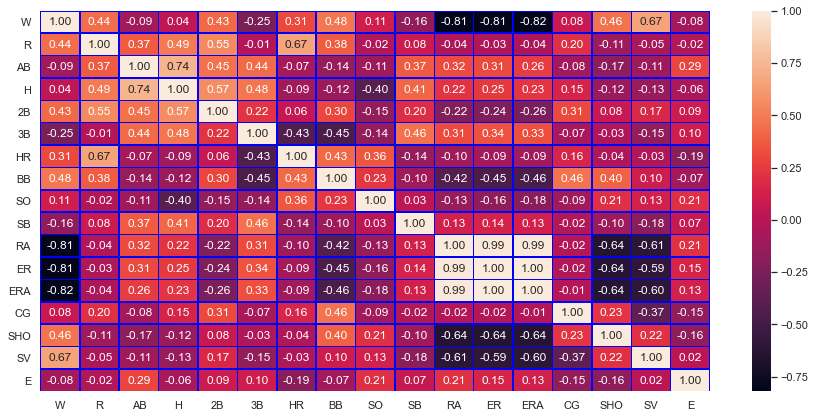

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="blue", fmt='.2f')

In [53]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  685.825000  5516.266667  1403.533333  274.733333   
std     10.453455   51.152795    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  818.750000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.955875   3.466667  11.166667  43.033333   93.145833  
std     70.140786   0.452963   2.763473   3.815425   7.788069   11.696507  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.026250  11.000000  19.000000  61.000000  112.875000

In [54]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of         W       R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.00  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.00  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.00  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.00  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.00  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  818.75  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.00  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.00  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.00  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.00  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.00  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0

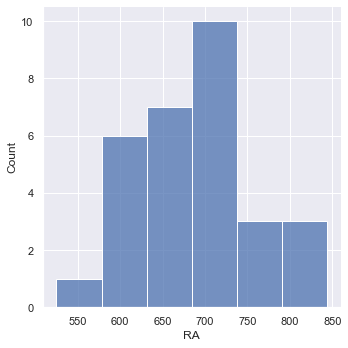

In [55]:
sns.displot(df["RA"])

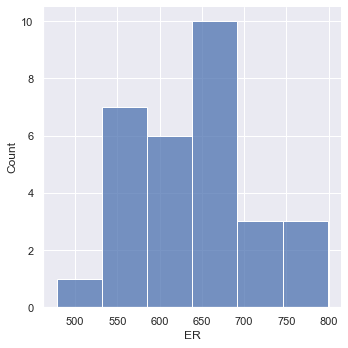

In [56]:
sns.displot(df["ER"])

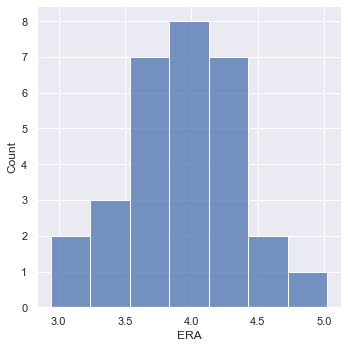

In [57]:
sns.displot(df["ERA"])

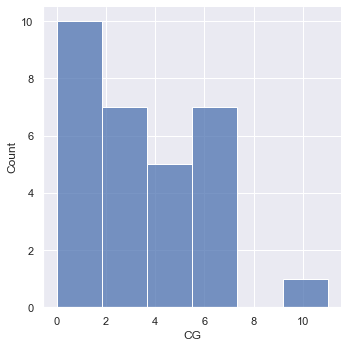

In [58]:
sns.displot(df["CG"])

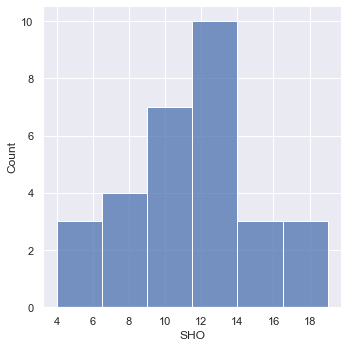

In [59]:
sns.displot(df["SHO"])

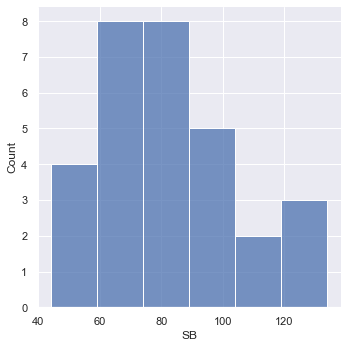

In [60]:
sns.displot(df["SB"])

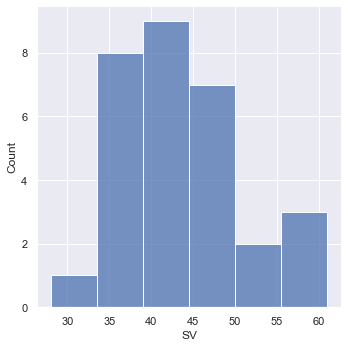

In [61]:
sns.displot(df["SV"])

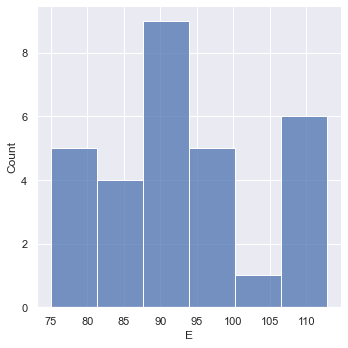

In [62]:
sns.displot(df["E"])

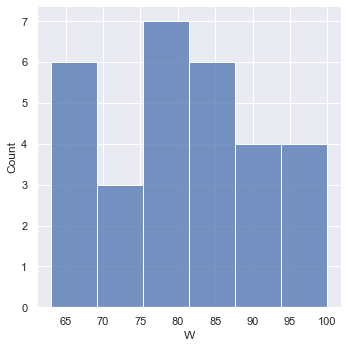

In [63]:
sns.displot(df["W"])

In [64]:
df.shape

(30, 17)

In [65]:
import scipy.stats as stats
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df

W       R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.00  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.00  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.00  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.00  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.00  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  818.75  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.00  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.00  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.00  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.00  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.00  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.00  5459.0  1363.0  278.0  26.0  230.0  486.0  1392.0  121.0   
12   85.0  661.00  5417.0  1331.0  243.0  21.0  176.0  435.0  1150.0   52.0   
13   76.0  656.00  5544.0  1379.0  262.0  22.0  198.0  478.0  1336.0   69.0   
14   68.0  694.00  5600.0  1405.0  277.0  46.0  146.0  475.0  1119.0   78.0   
15  100.0  647.00  5484.0  1386.0  288.0  39.0  137.0  506.0  1267.0   69.0   
16   98.0  697.00  5631.0  1462.0  292.0  27.0  140.0  461.0  1322.0   98.0   
17   97.0  689.00  5491.0  1341.0  272.0  30.0  171.0  567.0  1518.0   95.0   
18   68.0  655.00  5480.0  1378.0  274.0  34.0  145.0  412.0  1299.0   84.0   
19   64.0  640.00  5571.0  1382.0  257.0  27.0  167.0  496.0  1255.0  134.0   
20   90.0  683.00  5527.0  1351.0  295.0  17.0  177.0  488.0  1290.0   51.0   
21   83.0  703.00  5428.0  1363.0  265.0  13.0  177.0  539.0  1344.0   57.0   
22   71.0  613.00  5463.0  1420.0  236.0  40.0  120.0  375.0  1150.0  112.0   
23   67.0  573.00  5420.0  1361.0  251.0  18.0  100.0  471.0  1107.0   69.0   
24   63.0  626.00  5529.0  1374.0  272.0  37.0  130.0  387.0  1274.0   88.0   
25   92.0  667.00  5385.0  1346.0  263.0  26.0  187.0  563.0  1258.0   59.0   
26   84.0  696.00  5565.0  1486.0  288.0  39.0  136.0  457.0  1159.0   93.0   
27   79.0  720.00  5649.0  1494.0  289.0  48.0  154.0  490.0  1312.0  132.0   
28   74.0  650.00  5457.0  1324.0  260.0  36.0  148.0  426.0  1327.0   82.0   
29   68.0  737.00  5572.0  1479.0  274.0  49.0  186.0  388.0  1283.0   97.0   

       RA     ER      ERA    CG   SHO    SV        E  
0   641.0  601.0  3.73000   2.0   8.0  56.0   88.000  
1   700.0  653.0  4.07000   2.0  12.0  45.0   86.000  
2   640.0  584.0  3.67000  11.0  10.0  38.0   79.000  
3   701.0  643.0  3.98000   7.0   9.0  37.0  101.000  
4   803.0  746.0  4.64000   7.0  12.0  35.0   86.000  
5   670.0  609.0  3.80000   7.0  10.0  34.0   88.000  
6   698.0  652.0  4.03000   3.0   4.0  48.0   93.000  
7   693.0  646.0  4.05000   0.0  10.0  43.0   77.000  
8   642.0  604.0  3.74000   1.0  12.0  60.0   95.000  
9   753.0  694.0  4.31000   3.0  10.0  40.0   97.000  
10  733.0  680.0  4.24000   5.0   9.0  45.0  112.875  
11  618.0  572.0  3.57000   5.0  13.0  39.0   85.000  
12  675.0  630.0  3.94000   2.0  12.0  46.0   93.000  
13  726.0  677.0  4.16000   6.0  12.0  45.0   94.000  
14  729.0  664.0  4.14000   5.0  15.0  28.0  112.875  
15  525.0  478.0  2.94000   1.0  15.0  61.0   96.000  
16  596.0  532.0  3.21000   0.0  13.0  54.0  112.875  
17  608.0  546.0  3.36000   6.0  19.0  48.0  111.000  
18  737.0  682.0  4.28000   1.0   7.0  40.0  112.875  
19  754.0  700.0  4.33000   2.0   8.0  35.0   90.000  
20  613.0  557.0  3.43000   1.0  14.0  50.0   88.000  
21  635.0  577.0  3.62000   4.0  13.0  41.0   90.000  
22  678.0  638.0  4.02000   0.0  12.0  35.0   77.000  
23  760.0  698.0  4.41000   3.0  10.0  44.0   90.000  
24  809.0  749.0  4.69000   1.0   7.0  35.0  112.875  
25  595.0  553.0  3.44000   6.0  19.0  47.0   75.000  
26  627.0  597.0  3.72000   7.0  18.0  41.0   78.000  
27  713.0  659.0  

# Splitting the dataset into 2 variables namely 'X' and 'Y'

In [66]:
X=df.drop('CG',axis=1)
Y=df['CG']

In [67]:
Y.value_counts()

1.0     7
7.0     4
2.0     4
5.0     3
3.0     3
6.0     3
0.0     3
4.0     2
11.0    1
Name: CG, dtype: int64

In [68]:
Y.value_counts()

1.0     7
7.0     4
2.0     4
5.0     3
3.0     3
6.0     3
0.0     3
4.0     2
11.0    1
Name: CG, dtype: int64

In [69]:
X

W       R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.00  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.00  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.00  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.00  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.00  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  818.75  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.00  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.00  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.00  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.00  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.00  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.00  5459.0  1363.0  278.0  26.0  230.0  486.0  1392.0  121.0   
12   85.0  661.00  5417.0  1331.0  243.0  21.0  176.0  435.0  1150.0   52.0   
13   76.0  656.00  5544.0  1379.0  262.0  22.0  198.0  478.0  1336.0   69.0   
14   68.0  694.00  5600.0  1405.0  277.0  46.0  146.0  475.0  1119.0   78.0   
15  100.0  647.00  5484.0  1386.0  288.0  39.0  137.0  506.0  1267.0   69.0   
16   98.0  697.00  5631.0  1462.0  292.0  27.0  140.0  461.0  1322.0   98.0   
17   97.0  689.00  5491.0  1341.0  272.0  30.0  171.0  567.0  1518.0   95.0   
18   68.0  655.00  5480.0  1378.0  274.0  34.0  145.0  412.0  1299.0   84.0   
19   64.0  640.00  5571.0  1382.0  257.0  27.0  167.0  496.0  1255.0  134.0   
20   90.0  683.00  5527.0  1351.0  295.0  17.0  177.0  488.0  1290.0   51.0   
21   83.0  703.00  5428.0  1363.0  265.0  13.0  177.0  539.0  1344.0   57.0   
22   71.0  613.00  5463.0  1420.0  236.0  40.0  120.0  375.0  1150.0  112.0   
23   67.0  573.00  5420.0  1361.0  251.0  18.0  100.0  471.0  1107.0   69.0   
24   63.0  626.00  5529.0  1374.0  272.0  37.0  130.0  387.0  1274.0   88.0   
25   92.0  667.00  5385.0  1346.0  263.0  26.0  187.0  563.0  1258.0   59.0   
26   84.0  696.00  5565.0  1486.0  288.0  39.0  136.0  457.0  1159.0   93.0   
27   79.0  720.00  5649.0  1494.0  289.0  48.0  154.0  490.0  1312.0  132.0   
28   74.0  650.00  5457.0  1324.0  260.0  36.0  148.0  426.0  1327.0   82.0   
29   68.0  737.00  5572.0  1479.0  274.0  49.0  186.0  388.0  1283.0   97.0   

       RA     ER      ERA   SHO    SV        E  
0   641.0  601.0  3.73000   8.0  56.0   88.000  
1   700.0  653.0  4.07000  12.0  45.0   86.000  
2   640.0  584.0  3.67000  10.0  38.0   79.000  
3   701.0  643.0  3.98000   9.0  37.0  101.000  
4   803.0  746.0  4.64000  12.0  35.0   86.000  
5   670.0  609.0  3.80000  10.0  34.0   88.000  
6   698.0  652.0  4.03000   4.0  48.0   93.000  
7   693.0  646.0  4.05000  10.0  43.0   77.000  
8   642.0  604.0  3.74000  12.0  60.0   95.000  
9   753.0  694.0  4.31000  10.0  40.0   97.000  
10  733.0  680.0  4.24000   9.0  45.0  112.875  
11  618.0  572.0  3.57000  13.0  39.0   85.000  
12  675.0  630.0  3.94000  12.0  46.0   93.000  
13  726.0  677.0  4.16000  12.0  45.0   94.000  
14  729.0  664.0  4.14000  15.0  28.0  112.875  
15  525.0  478.0  2.94000  15.0  61.0   96.000  
16  596.0  532.0  3.21000  13.0  54.0  112.875  
17  608.0  546.0  3.36000  19.0  48.0  111.000  
18  737.0  682.0  4.28000   7.0  40.0  112.875  
19  754.0  700.0  4.33000   8.0  35.0   90.000  
20  613.0  557.0  3.43000  14.0  50.0   88.000  
21  635.0  577.0  3.62000  13.0  41.0   90.000  
22  678.0  638.0  4.02000  12.0  35.0   77.000  
23  760.0  698.0  4.41000  10.0  44.0   90.000  
24  809.0  749.0  4.69000   7.0  35.0  112.875  
25  595.0  553.0  3.44000  19.0  47.0   75.000  
26  627.0  597.0  3.72000  18.0  41.0   78.000  
27  713.0  659.0  4.04000  12.0  44.0   86.000  
28  731.0  655.0  4.09000   6.0  41.0   92.000  
29  844.0  799.0  5.02625   4.0  36.0   95.000

In [70]:
Y

0      2.0
1      2.0
2     11.0
3      7.0
4      7.0
5      7.0
6      3.0
7      0.0
8      1.0
9      3.0
10     5.0
11     5.0
12     2.0
13     6.0
14     5.0
15     1.0
16     0.0
17     6.0
18     1.0
19     2.0
20     1.0
21     4.0
22     0.0
23     3.0
24     1.0
25     6.0
26     7.0
27     1.0
28     1.0
29     4.0
Name: CG, dtype: float64

# Label Binarization

In [71]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [72]:
Y

0     0
1     0
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
Name: CG, dtype: int64

In [73]:
X

W       R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.00  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.00  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.00  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.00  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.00  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  818.75  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.00  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.00  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.00  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.00  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.00  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.00  5459.0  1363.0  278.0  26.0  230.0  486.0  1392.0  121.0   
12   85.0  661.00  5417.0  1331.0  243.0  21.0  176.0  435.0  1150.0   52.0   
13   76.0  656.00  5544.0  1379.0  262.0  22.0  198.0  478.0  1336.0   69.0   
14   68.0  694.00  5600.0  1405.0  277.0  46.0  146.0  475.0  1119.0   78.0   
15  100.0  647.00  5484.0  1386.0  288.0  39.0  137.0  506.0  1267.0   69.0   
16   98.0  697.00  5631.0  1462.0  292.0  27.0  140.0  461.0  1322.0   98.0   
17   97.0  689.00  5491.0  1341.0  272.0  30.0  171.0  567.0  1518.0   95.0   
18   68.0  655.00  5480.0  1378.0  274.0  34.0  145.0  412.0  1299.0   84.0   
19   64.0  640.00  5571.0  1382.0  257.0  27.0  167.0  496.0  1255.0  134.0   
20   90.0  683.00  5527.0  1351.0  295.0  17.0  177.0  488.0  1290.0   51.0   
21   83.0  703.00  5428.0  1363.0  265.0  13.0  177.0  539.0  1344.0   57.0   
22   71.0  613.00  5463.0  1420.0  236.0  40.0  120.0  375.0  1150.0  112.0   
23   67.0  573.00  5420.0  1361.0  251.0  18.0  100.0  471.0  1107.0   69.0   
24   63.0  626.00  5529.0  1374.0  272.0  37.0  130.0  387.0  1274.0   88.0   
25   92.0  667.00  5385.0  1346.0  263.0  26.0  187.0  563.0  1258.0   59.0   
26   84.0  696.00  5565.0  1486.0  288.0  39.0  136.0  457.0  1159.0   93.0   
27   79.0  720.00  5649.0  1494.0  289.0  48.0  154.0  490.0  1312.0  132.0   
28   74.0  650.00  5457.0  1324.0  260.0  36.0  148.0  426.0  1327.0   82.0   
29   68.0  737.00  5572.0  1479.0  274.0  49.0  186.0  388.0  1283.0   97.0   

       RA     ER      ERA   SHO    SV        E  
0   641.0  601.0  3.73000   8.0  56.0   88.000  
1   700.0  653.0  4.07000  12.0  45.0   86.000  
2   640.0  584.0  3.67000  10.0  38.0   79.000  
3   701.0  643.0  3.98000   9.0  37.0  101.000  
4   803.0  746.0  4.64000  12.0  35.0   86.000  
5   670.0  609.0  3.80000  10.0  34.0   88.000  
6   698.0  652.0  4.03000   4.0  48.0   93.000  
7   693.0  646.0  4.05000  10.0  43.0   77.000  
8   642.0  604.0  3.74000  12.0  60.0   95.000  
9   753.0  694.0  4.31000  10.0  40.0   97.000  
10  733.0  680.0  4.24000   9.0  45.0  112.875  
11  618.0  572.0  3.57000  13.0  39.0   85.000  
12  675.0  630.0  3.94000  12.0  46.0   93.000  
13  726.0  677.0  4.16000  12.0  45.0   94.000  
14  729.0  664.0  4.14000  15.0  28.0  112.875  
15  525.0  478.0  2.94000  15.0  61.0   96.000  
16  596.0  532.0  3.21000  13.0  54.0  112.875  
17  608.0  546.0  3.36000  19.0  48.0  111.000  
18  737.0  682.0  4.28000   7.0  40.0  112.875  
19  754.0  700.0  4.33000   8.0  35.0   90.000  
20  613.0  557.0  3.43000  14.0  50.0   88.000  
21  635.0  577.0  3.62000  13.0  41.0   90.000  
22  678.0  638.0  4.02000  12.0  35.0   77.000  
23  760.0  698.0  4.41000  10.0  44.0   90.000  
24  809.0  749.0  4.69000   7.0  35.0  112.875  
25  595.0  553.0  3.44000  19.0  47.0   75.000  
26  627.0  597.0  3.72000  18.0  41.0   78.000  
27  713.0  659.0  4.04000  12.0  44.0   86.000  
28  731.0  655.0  4.09000   6.0  41.0   92.000  
29  844.0  799.0  5.02625   4.0  36.0   95.000

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

W         R        AB         H        2B        3B        HR  \
0   1.365409  0.759052  0.847731  1.663685  1.420173  1.041193 -0.787299   
1   0.197838  0.202314 -0.711094 -0.970681  0.127403  1.235809 -0.243967   
2   0.003243 -0.334539 -1.115233 -0.151891  1.588795 -0.223808 -0.723377   
3  -0.483244 -1.269063  0.241522 -0.401088 -0.828122 -0.418423 -0.883181   
4  -0.677839  0.063130  1.280738  1.984081  0.801892  1.722347 -0.403770   
5   1.170814  2.643011 -0.104884  1.361089  1.869832 -1.391501  2.185047   
6   0.587028  1.554391  0.732263 -0.116292 -0.153633 -1.196885  1.545833   
7   0.003243  0.540333 -0.451289 -0.596886 -1.615025 -1.099578  1.705636   
8  -0.094054 -0.831626 -0.451289 -0.365489  0.183611  0.068115  0.107601   
9  -0.288649  1.236255  1.785913  1.628086  1.082929  0.165423 -0.084163   
10  0.684326  1.295905 -0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.858469 -0.826562 -0.721484  0.183611 -0.515731  2.121125   
12  0.392433 -0.493607 -1.432772 -1.291077 -1.783647 -1.002270  0.395247   
13 -0.483244 -0.593025  0.400291 -0.436688 -0.715707 -0.904962  1.098383   
14 -1.261625  0.162547  1.208570  0.026106  0.127403  1.430424 -0.563574   
15  1.851896 -0.771976 -0.465723 -0.312089  0.745685  0.749270 -0.851220   
16  1.657301  0.222198  1.656011  1.040693  0.970514 -0.418423 -0.755338   
17  1.560004  0.063130 -0.364688 -1.113079 -0.153633 -0.126500  0.235444   
18 -1.261625 -0.612908 -0.523457 -0.454487 -0.041219  0.262731 -0.595534   
19 -1.650815 -0.911160  0.789997 -0.383288 -0.996744 -0.418423  0.107601   
20  0.878921 -0.056171  0.154920 -0.935081  1.139136 -1.391501  0.427208   
21  0.197838  0.341499 -1.274002 -0.721484 -0.547085 -1.780732  0.427208   
22 -0.969732 -1.448014 -0.768828  0.293103 -2.177099  0.846578 -1.394552   
23 -1.358922 -2.243353 -1.389471 -0.757084 -1.333988 -1.294193 -2.033766   
24 -1.748112 -1.189529  0.183787 -0.525687 -0.153633  0.554654 -1.074945   
25  1.073516 -0.374306 -1.894646 -1.024080 -0.659500 -0.515731  0.746815   
26  0.295136  0.202314  0.703396  1.467888  0.745685  0.749270 -0.883181   
27 -0.191352  0.679518  1.915815  1.610286  0.801892  1.625040 -0.307888   
28 -0.677839 -0.712325 -0.855429 -1.415675 -0.828122  0.457346 -0.499652   
29 -1.261625  1.017537  0.804431  1.343289 -0.041219  1.722347  0.714854   

          BB        SO        SB        RA        ER       ERA       SHO  \
0  -1.534902 -2.697630  0.913883 -0.666234 -0.505110 -0.507186 -0.844153   
1  -0.536592  0.154878 -0.601826  0.165971  0.248930  0.256260  0.222145   
2   1.139144 -0.893982  0.111449 -0.680339 -0.751623 -0.641912 -0.311004   
3  -1.160536 -0.168602 -0.690985  0.180076  0.103922  0.054171 -0.577578   
4  -0.251360  0.105866 -0.022290  1.618803  1.597501  1.536154  0.222145   
5   1.798742 -0.952796  0.200609 -0.257184 -0.389104 -0.350006 -0.311004   
6   1.513510 -0.207812 -0.913883  0.137760  0.234429  0.166442 -1.910451   
7  -0.910958  0.811641 -1.760897  0.067235  0.147424  0.211351 -0.311004   
8  -0.590073  0.605790  0.156029 -0.652129 -0.461608 -0.484732  0.222145   
9   0.158660 -0.982204 -0.557246  0.913544  0.843461  0.795162 -0.311004   
10  0.604334 -0.148997  0.780144  0.631441  0.640451  0.637982 -0.577578   
11  0.301276  1.409590  1.671738 -0.990653 -0.925632 -0.866455  0.488720   
12 -0.607900 -0.962599 -1.404260 -0.186658 -0.084588 -0.035646  0.222145   
13  0.158660  0.860654 -0.646405  0.532705  0.596948  0.458348  0.222145   
14  0.105179 -1.266474 -0.245188  0.575021  0.408438  0.413440  1.021869   
15  0.657815  0.184286 -0.646405 -2.302433 -2.288705 -2.281075  1.021869   
16 -0.144398  0.723420  0.646405 -1.300966 -1.505663 -1.674809  0.488720   
17  1.745261  2.644696  0.512666 -1.131704 -1.302652 -1.337995  2.088167   
18 -1.017920  0.497964  0.022290  0.687862  0.669452  0.727800 -1.110727   
19  0.479546  0.066657  2.251273  0.927650  0.930466  0.840071 -0.844153   
20  0.336930  0.409742 -1.448839 -1.061179 -1.143144 -1.18

# Train and Test of datasets

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model for Classification and Evaluation

In [76]:
#Classification of model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
#Training the model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    class_report=classification_report(Y_test,pred)
    print("\nClassification Report:\n",class_report)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [77]:
#Logistic Regression model
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 50.0

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6

Cross Validation Score: 73.33333333333334

Accuracy Score - Cross Validation Score is -23.333333333333343


In [78]:
#Vector Classifier
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)

Accuracy Score: 83.33333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Cross Validation Score: 83.33333333333334

Accuracy Score - Cross Validation Score is 0.0


In [79]:
#Decision Tree Classifier
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 50.0

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6

Cross Validation Score: 80.0

Accuracy Score - Cross Validation Score is -30.0


In [80]:
#Random Forest Classifier
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 66.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.40      0.40      0.40         6
weighted avg       0.67      0.67      0.67         6

Cross Validation Score: 73.33333333333333

Accuracy Score - Cross Validation Score is -6.666666666666671


In [81]:
#KNeighbors Classifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 83.33333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Cross Validation Score: 83.33333333333334

Accuracy Score - Cross Validation Score is 0.0


In [82]:
#Extra Tree Classifier
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 66.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.40      0.40      0.40         6
weighted avg       0.67      0.67      0.67         6

Cross Validation Score: 76.66666666666667

Accuracy Score - Cross Validation Score is -10.000000000000014


# AUC ROC Curve

In [83]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 83.33333333333334


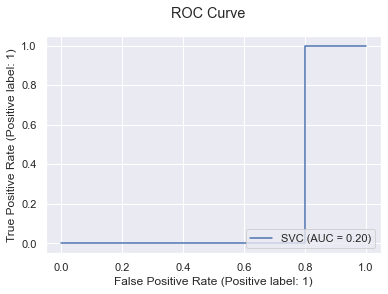

In [84]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()